In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from read_ASC import read_asc
from read_ASC import dls_sls_analysis
from read_ASC import contin_fit

import sympy as sp
import pandas as pd
from functions import *

In [3]:
sls_test = dls_sls_analysis('/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.99micrometer - alle hoeken - meer hoeken')
sorted(set(sls_test.sample_angles))

[15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.

Fitted parameters: beta = 0.999, Diff_coef (square micrometer per second) = 0.40466, Hydrodynamic Radius = 516.51 nm


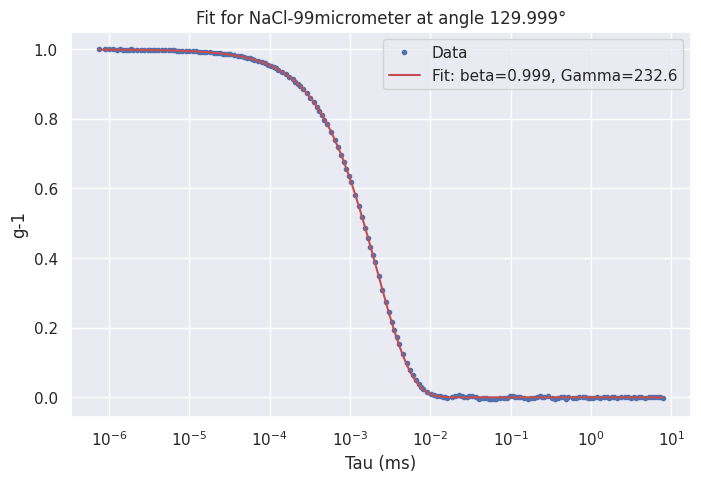

In [4]:
sls_test.get_data(indices=1)[1].plot_fit()

In [5]:
def optical_constant_K(n0, dn_dc, wavelength_nm):
    """
    n0           : solvent refractive index
    dn_dc        : refractive index increment (mL/g)
    wavelength_nm: laser wavelength in nm
    """
    NA = 6.02214076e23  # mol^-1
    lam = wavelength_nm * 1e-9  # nm → m

    K = (4 * np.pi**2 * n0**2 / (NA * lam**4)) * (dn_dc * 1e-6)**2
    return K

In [ ]:
sls_test.get_data(data_type='solvent')

{'NaClsolvent, angle 100, dur 60, 12:41:11PM': <read_ASC.read_asc at 0x7aed6bcd1250>,
 'NaClsolvent, angle 101, dur 60, 12:42:30PM': <read_ASC.read_asc at 0x7aed6bef4bc0>,
 'NaClsolvent, angle 102, dur 60, 12:43:49PM': <read_ASC.read_asc at 0x7aed6ba6f350>,
 'NaClsolvent, angle 103, dur 60, 12:45:09PM': <read_ASC.read_asc at 0x7aed6ba3a600>,
 'NaClsolvent, angle 104, dur 60, 12:46:28PM': <read_ASC.read_asc at 0x7aed6bcd1430>,
 'NaClsolvent, angle 105, dur 60, 12:47:46PM': <read_ASC.read_asc at 0x7aed6bef6390>,
 'NaClsolvent, angle 106, dur 60, 12:49:05PM': <read_ASC.read_asc at 0x7aed6bef4980>,
 'NaClsolvent, angle 107, dur 60, 12:50:24PM': <read_ASC.read_asc at 0x7aed6ba6d070>,
 'NaClsolvent, angle 108, dur 60, 12:51:43PM': <read_ASC.read_asc at 0x7aed6ba6e9f0>,
 'NaClsolvent, angle 109, dur 60, 12:53:01PM': <read_ASC.read_asc at 0x7aed6bcd2720>,
 'NaClsolvent, angle 110, dur 60, 12:54:20PM': <read_ASC.read_asc at 0x7aed6bef4200>,
 'NaClsolvent, angle 111, dur 60, 12:55:39PM': <read_A

In [ ]:
def guinier_model(q, I0, Rg):
    """Guinier model for small-angle scattering."""
    return I0 * np.exp(-q**2 * Rg**2 / 3)

array([[inf, inf],
       [inf, inf]])

Rg = 37.94 nm
-479.70070876096634


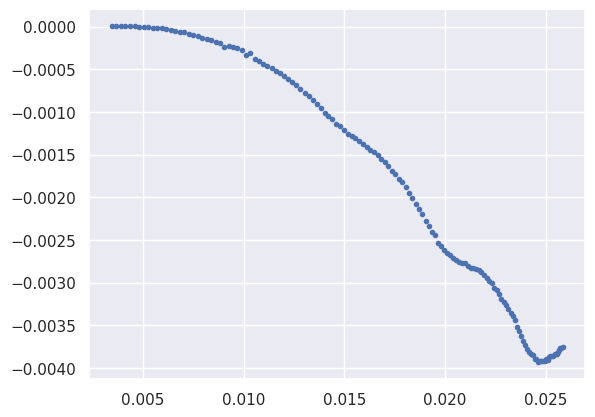

In [ ]:
from scipy.optimize import curve_fit
intensities = []
kal_int = []
I_excess = []
q = []
for angle in sorted(set(sls_test.sample_angles)):
    intensities.append(np.mean(sls_test.get_data(angle,data_type='solution',indices=0)[1].CountRatey)/sls_test.get_data(angle,data_type='solution',indices=0)[1].MonitorDiode)
    kal_int.append(np.mean(sls_test.get_data(angle,data_type='solvent',indices=0)[1].CountRatey)/sls_test.get_data(angle,data_type='solvent',indices=0)[1].MonitorDiode)
    I_excess.append(intensities[-1]-kal_int[-1])
    q.append((sls_test.get_data(angle,data_type='solution',indices=0)[1].q*1e-9))


plt.plot(np.array(q)**2,(np.log(np.array(intensities))),'.')
# use only lowest-q points
N = 10
x = np.array(q)[5:N]
y = np.log(I_excess[5:N])

slope, intercept = np.polyfit(x, y, 1)
Rg = np.sqrt(-3 * slope)

print(f"Rg = {Rg:.2f} nm")
print(slope)

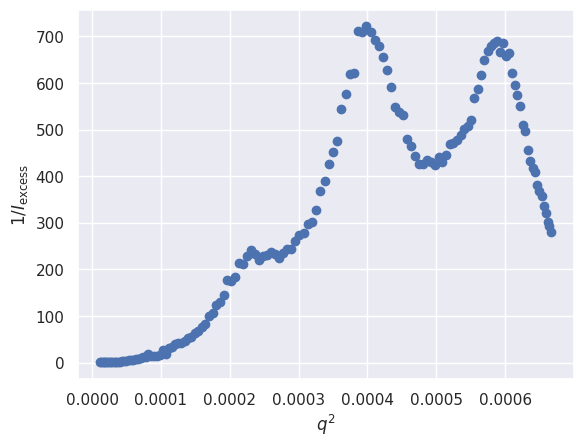

In [ ]:
q_vals = np.array(q)
int_excess = np.array(I_excess)

plt.plot(q_vals, 1/int_excess, 'o')
plt.xlabel(r'$q^2$')
plt.ylabel(r'$1 / I_{\mathrm{excess}}$')
plt.show()

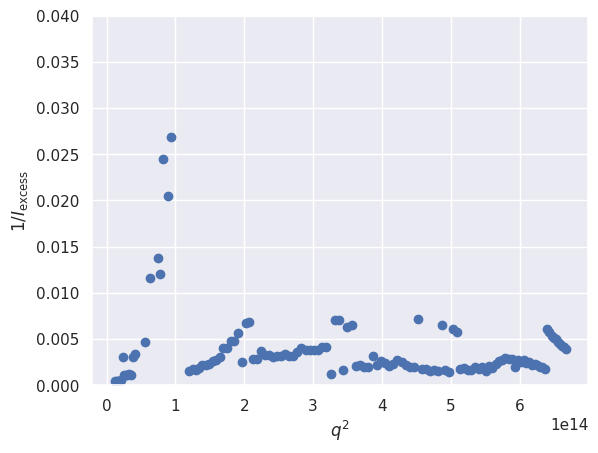

In [ ]:
int_excess = []
q_vals = []

for angle in sorted(set(sls_test.sample_angles)):
    sol = sls_test.get_data(angle, data_type='solution', indices=0)[1]
    solv = sls_test.get_data(angle, data_type='solvent', indices=0)[1]

    I_sol = np.mean(sol.CountRatey)
    I_solv = np.mean(solv.CountRatey)

    I_excess = I_sol - I_solv
    if I_excess > 0:  # avoid log and division errors
        int_excess.append(I_excess)
        q_vals.append(np.mean(sol.q))
q_vals = np.array(q_vals)
int_excess = np.array(int_excess)

plt.plot(q_vals**2, 1/int_excess, 'o')
plt.xlabel(r'$q^2$')
plt.ylabel(r'$1 / I_{\mathrm{excess}}$')
plt.ylim(0,0.04)
plt.show()


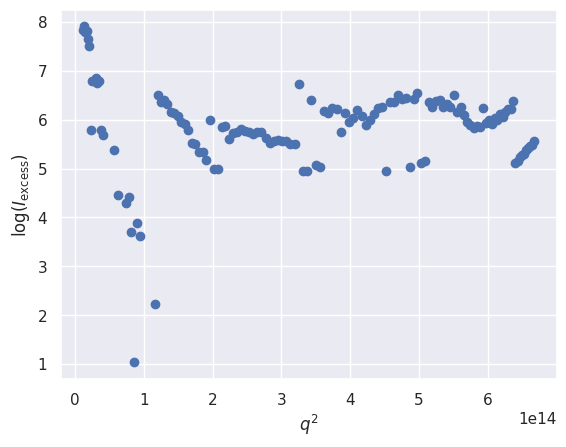

In [ ]:
plt.plot(q_vals**2, np.log(int_excess), 'o')
plt.xlabel(r'$q^2$')
plt.ylabel(r'$\log(I_{\mathrm{excess}})$')
plt.show()


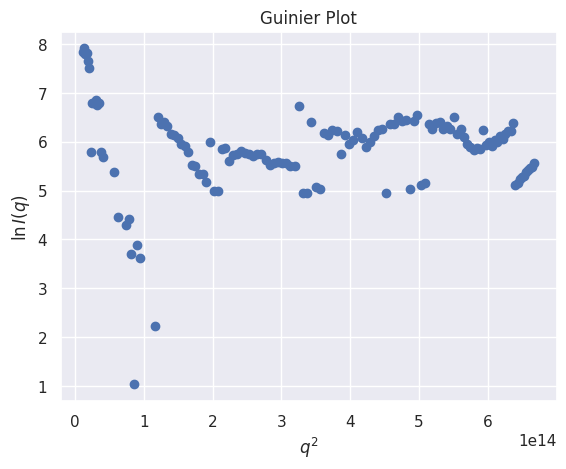

In [ ]:
I_excess = []
q_vals = []

for angle in sorted(set(sls_test.sample_angles)):
    sol = sls_test.get_data(angle, data_type='solution', indices=0)[1]
    solv = sls_test.get_data(angle, data_type='solvent')

    I_sol = np.mean(sol.CountRatey)
    I_solv = np.mean(solv.CountRatey)

    I = I_sol - I_solv
    if I > 0:  # required for log
        I_excess.append(I)
        q_vals.append(np.mean(sol.q))

I_excess = np.array(I_excess)
q_vals = np.array(q_vals)

plt.figure()
plt.plot(q_vals**2, np.log(I_excess), 'o')
plt.xlabel(r'$q^2$')
plt.ylabel(r'$\ln I(q)$')
plt.title('Guinier Plot')
plt.show()

In [6]:
config = dict(recalc=True,
        ptRangeSec=(5e-7, 6e0), fitRangeM=(1e-9, 4000e-9), gridpts=200,
        transformData=True, baselineCoeffs=0, # N_L
        # weighs noise level of data points accordinly for photon correlation spectroscopy
        # where the variance of Y is proportional to (Y**2+1)/(4*Y**2)
        # (from contin.for, line 1430)
        weighResiduals=True)

DEBUG CONTIN input: angle=89.999°, T=292.01302K, visc=1.03017 cp, λ=632.8 nm
DEBUG q=1.870e+07  calc_const=2.076e-19 gamma_unit=7.263e-05
DEBUG Gamma_min=7.159e-02  Gamma_max=9.637e-06
89.999 1.332 6.328e-07 292.01 0.0010301
DEBUG CONTIN input: angle=89.999°, T=292.06576K, visc=1.02882 cp, λ=632.8 nm
DEBUG q=1.870e+07  calc_const=2.079e-19 gamma_unit=7.274e-05
DEBUG Gamma_min=9.293e-02  Gamma_max=6.736e-06
89.999 1.332 6.328e-07 292.06 0.0010287999999999999
DEBUG CONTIN input: angle=89.997°, T=292.21735K, visc=1.02497 cp, λ=632.8 nm
DEBUG q=1.870e+07  calc_const=2.088e-19 gamma_unit=7.305e-05
DEBUG Gamma_min=1.203e-01  Gamma_max=4.695e-06
89.997 1.332 6.328e-07 292.21 0.0010249
DEBUG CONTIN input: angle=89.999°, T=291.62342K, visc=1.04018 cp, λ=632.8 nm
DEBUG q=1.870e+07  calc_const=2.054e-19 gamma_unit=7.184e-05
DEBUG Gamma_min=1.590e-01  Gamma_max=3.342e-06
89.999 1.332 6.328e-07 291.62 0.0010401


<Figure size 640x480 with 0 Axes>

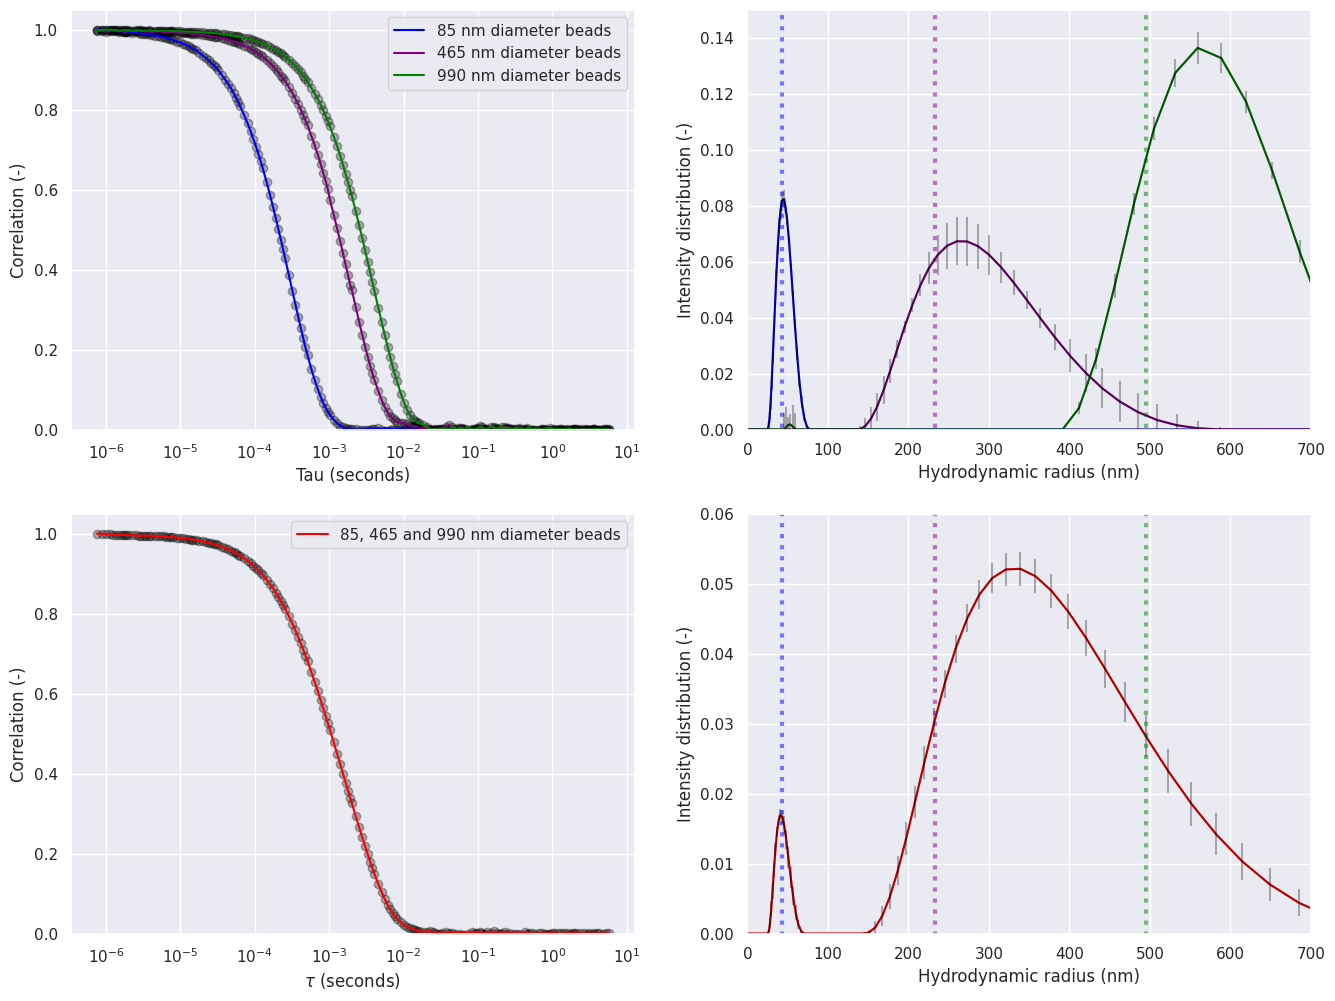

In [7]:

plt.clf()
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16,12)
color = ['blue','purple','green','red']
name = [f'{85} nm diameter beads', f'{465} nm diameter beads', f'{990} nm diameter beads', '85, 465 and 990 nm diameter beads']
for i,file_name in enumerate(['/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.085micrometer - per_5_graden', 
                        '/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.465micrometer - per_5_graden',
                        '/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.99micrometer - per_5_graden',
                        '/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes']):
        contin_test = contin_fit(path=file_name,angle = 90,continConfig=config,indices=1)
        contin_test.run_contin()
        dfDistrib, dfFit, varmap = contin_test.get_contin_result(contin_test.resultDirs[0]) 

        if i == 3:
            ax[1,1].plot(dfDistrib['radius(nm)'],dfDistrib['distrib'],color=color[i],label='Polydisperse - alle groottes')
            ax[1,1].errorbar(dfDistrib['radius(nm)'],dfDistrib['distrib'], dfDistrib['err'],color='black',alpha=0.3)
            ax[1,1].set_xlabel('Hydrodynamic radius (nm)')

            ax[1,1].set_ylabel('Intensity distribution (-)')

            # ax[1,1].relim()
            # ax[1,1].autoscale_view()
            ax[1,0].plot(dfFit['tau'], dfFit['corrFit'], color=color[i],label=name[i])
            ax[1,0].set_xscale('log')
            ax[1,0].scatter(dfFit['tau'],dfFit['corrIn'],color='black',alpha=0.3)
            ax[1,0].legend()
            ax[1,0].set_xlabel(r'$\tau$ (seconds)')
            ax[1,0].set_ylabel('Correlation (-)')
            # ax[1,0].relim()
            # ax[1,0].autoscale_view()

            
        else:
            ax[0,0].plot(dfFit['tau'], dfFit['corrFit'], color=color[i],label=name[i])
            ax[0,0].set_xscale('log')
            ax[0,0].scatter(dfFit['tau'],dfFit['corrIn'],color='black',alpha=0.3)
            ax[0,0].legend()
            ax[0,0].set_xlabel('Tau (seconds)')
            ax[0,0].set_ylabel('Correlation (-)')
            # ax[0,0].relim()
            # ax[0,0].autoscale_view()
            
            ax[0,1].plot(dfDistrib['radius(nm)'],dfDistrib['distrib'],color=color[i],label='Polydisperse - alle groottes')
            ax[0,1].errorbar(dfDistrib['radius(nm)'],dfDistrib['distrib'], dfDistrib['err'],color='black',alpha=0.3)
        
            ax[0,1].set_xlabel('Hydrodynamic radius (nm)')

            ax[0,1].set_ylabel('Intensity distribution (-)')
            # ax[0,1].relim()
            # ax[0,1].autoscale_view()

ax[0,1].vlines(465/2,ymin=-1,ymax=1,color='purple',linewidth=3,alpha=0.5,linestyle=':')
ax[0,1].vlines(990/2,ymin=-1,ymax=1,color='green',linewidth=3,alpha=0.5,linestyle=':')
ax[0,1].vlines(85/2,ymin=-1,ymax=1,color='blue',linewidth=3,alpha=0.5,linestyle=':')
ax[1,1].vlines(465/2,ymin=-1,ymax=1,color='purple',linewidth=3,alpha=0.5,linestyle=':')
ax[1,1].vlines(990/2,ymin=-1,ymax=1,color='green',linewidth=3,alpha=0.5,linestyle=':')
ax[1,1].vlines(85/2,ymin=-1,ymax=1,color='blue',linewidth=3,alpha=0.5,linestyle=':')
ax[0,1].set_ylim(-0.00,0.15)
ax[0,1].set_xlim(0,700)
ax[1,1].set_xlim(0,700)
ax[1,1].set_ylim(-0.00,0.06)
ax[0,0].set_ylim(-0.00,1.05)
ax[1,0].set_ylim(-0.00,1.05)



fig.savefig('mono_poly_fit.svg')

In [8]:
config = dict(recalc=True,
        ptRangeSec=(5e-7, 6e0), fitRangeM=(1e-9, 4000e-9), gridpts=200,
        transformData=True, baselineCoeffs=0, # N_L
        # weighs noise level of data points accordinly for photon correlation spectroscopy
        # where the variance of Y is proportional to (Y**2+1)/(4*Y**2)
        # (from contin.for, line 1430)
        weighResiduals=True)
test = contin_fit('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - 465 & 990',continConfig=config, indices = 1)

test.run_contin()

DEBUG CONTIN input: angle=89.999°, T=290.97639K, visc=1.05716 cp, λ=632.8 nm
DEBUG q=1.870e+07  calc_const=2.016e-19 gamma_unit=7.053e-05
DEBUG Gamma_min=7.373e-02  Gamma_max=9.925e-06


([PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - 465 & 990/solution/Contin_NaCl-465nm&990nm, angle 90, dur 60, 10:14:20AM')],
 'CONTIN analysis with 16 threads took 2.9s.')

89.999 1.332 6.328e-07 290.97 0.0010571


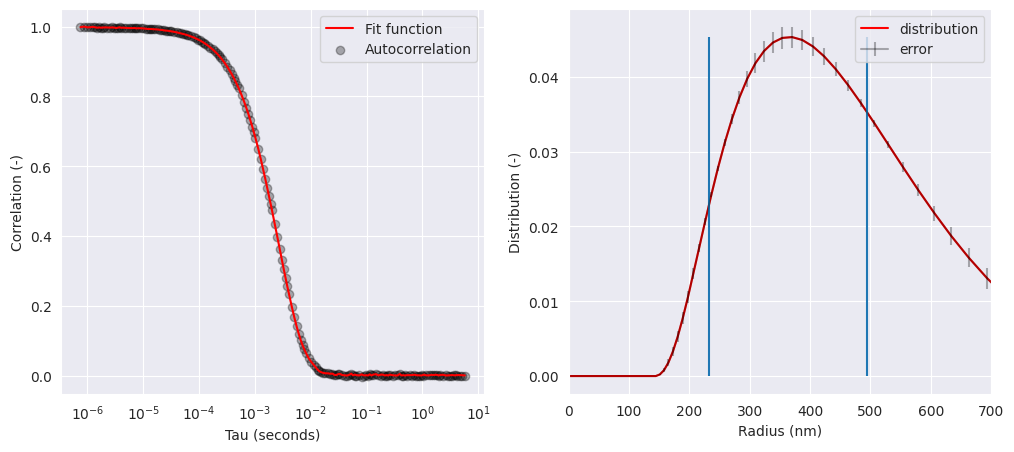

In [ ]:
dfDistrib, dfFit, varmap = test.get_contin_result(test.resultDirs[0])  

fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,5)
ax[0].plot(dfFit['tau'], dfFit['corrFit'], color='red',label='Fit function')
ax[0].set_xscale('log')
ax[0].scatter(dfFit['tau'],dfFit['corrIn'],color='black',alpha=0.3,label='Autocorrelation')
ax[0].legend()
ax[0].set_xlabel('Tau (seconds)')
ax[0].set_ylabel('Correlation (-)')

ax[1].plot(dfDistrib['radius(nm)'],dfDistrib['distrib'],color='red',label='distribution')
ax[1].set_xlim(0,700)
ax[1].errorbar(dfDistrib['radius(nm)'],dfDistrib['distrib'], dfDistrib['err'],color='black',alpha=0.3,label='error')
ax[1].legend()
ax[1].set_xlabel('Radius (nm)')
ax[1].set_ylabel('Distribution (-)')
ax[1].vlines(465/2,ymin=0,ymax=max(dfDistrib['distrib']))
ax[1].vlines(990/2,ymin=0,ymax=max(dfDistrib['distrib']))

<Axes: >

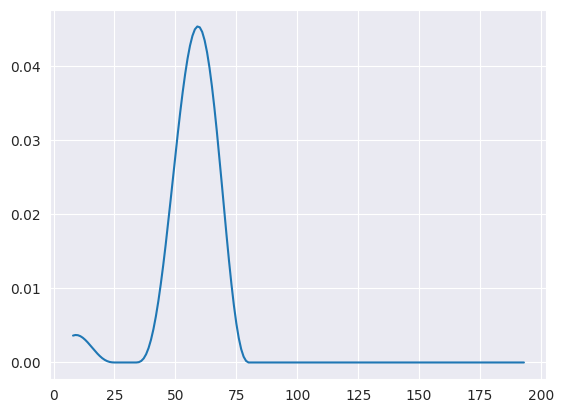

In [ ]:
dfDistrib['distrib'].plot()

Fitted parameters: beta = 0.997, Diff_coef (square micrometer per second) = 0.51250, Hydrodynamic Radius = 393.45 nm


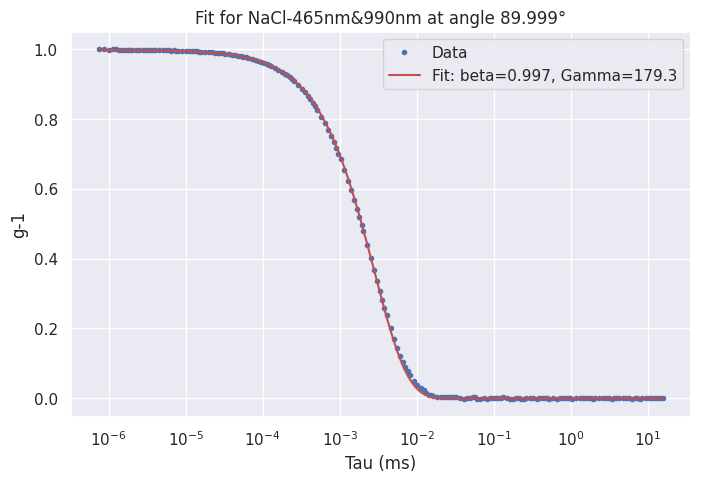

In [ ]:
_,test = dls_sls_analysis('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - 465 & 990').get_data(data_type='solution', indices=7)
test.plot_fit()


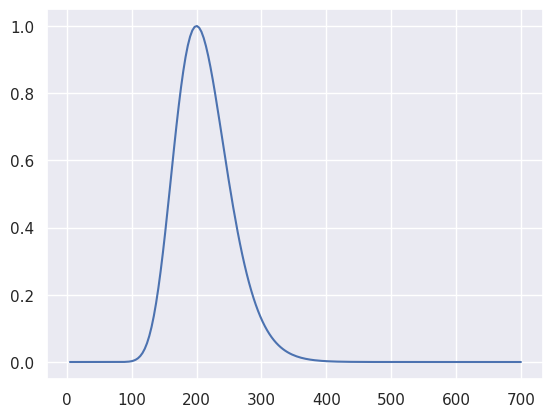

In [ ]:
r_nm = np.linspace(5, 700, 200)         # radius in nm
I = np.exp(-0.5*((np.log(r_nm)-np.log(200))/0.2)**2) 
plt.plot(r_nm,I)

DEBUG CONTIN input: angle=89.999°, T=292.01302K, visc=1.03017 cp, λ=632.8 nm
DEBUG q=1.870e+07  calc_const=2.076e-19 gamma_unit=7.263e-05
DEBUG Gamma_min=9.307e-02  Gamma_max=6.746e-06
89.999 1.332 6.328e-07 292.01 0.0010301
DEBUG CONTIN input: angle=89.999°, T=292.06576K, visc=1.02882 cp, λ=632.8 nm
DEBUG q=1.870e+07  calc_const=2.079e-19 gamma_unit=7.274e-05
DEBUG Gamma_min=1.208e-01  Gamma_max=4.715e-06
89.999 1.332 6.328e-07 292.06 0.0010287999999999999
DEBUG CONTIN input: angle=89.997°, T=292.21735K, visc=1.02497 cp, λ=632.8 nm
DEBUG q=1.870e+07  calc_const=2.088e-19 gamma_unit=7.305e-05
DEBUG Gamma_min=1.564e-01  Gamma_max=3.287e-06


/home/thijssnel/programeren/jaar_4/dls_sls_technical_internship/functions.py:451: SyntaxWarning: invalid escape sequence '\s'
  dfDistrib = pd.read_csv(fixedFloatFmt, sep='\s+', names=("distrib", "err", "decay"))


KeyboardInterrupt: 

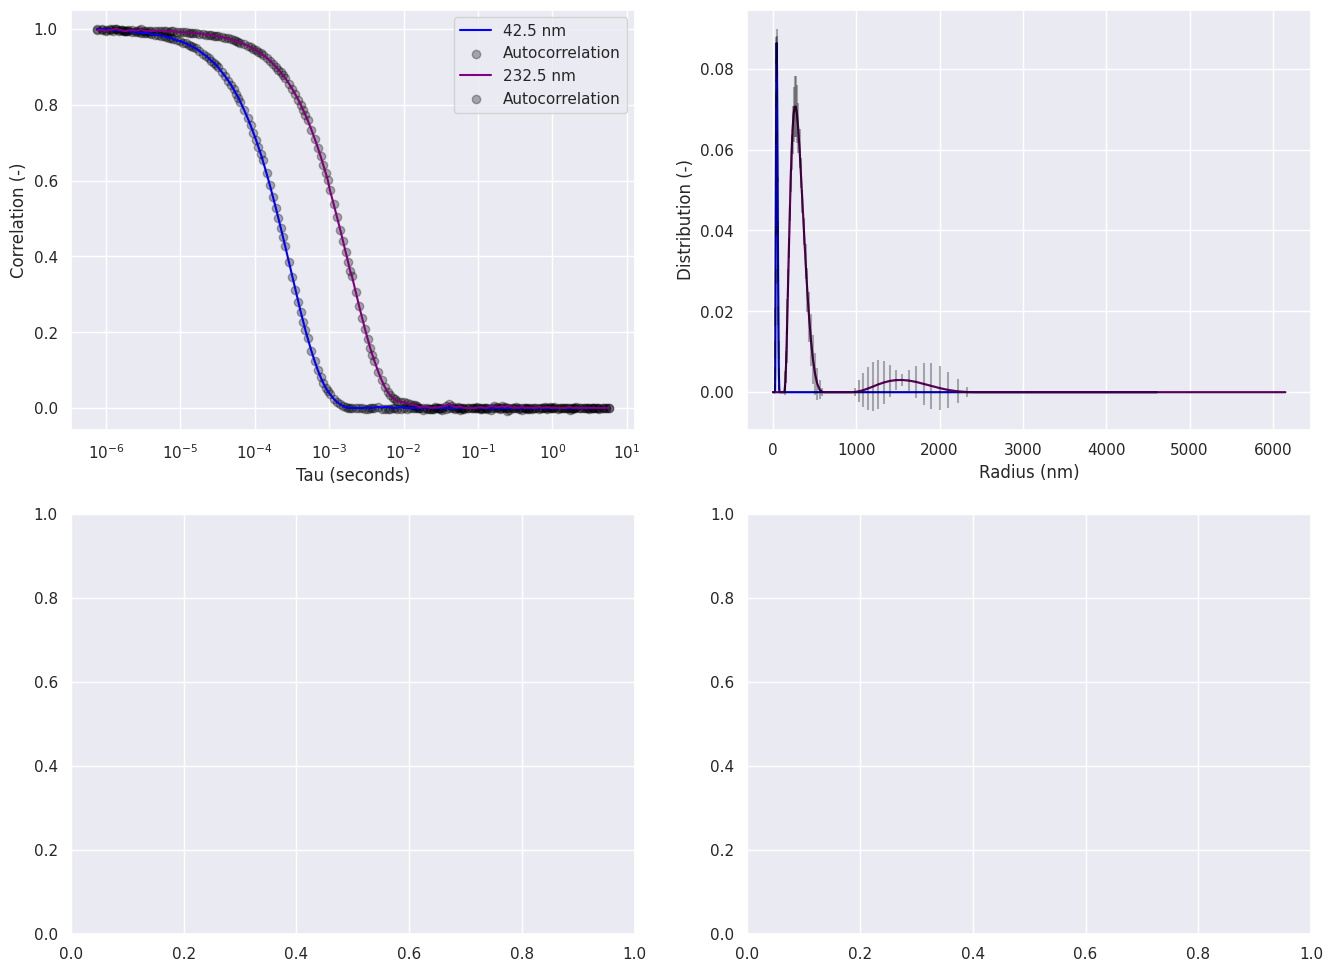

In [ ]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16,12)
color = ['blue','purple','green','red']
name = [f'{85/2} nm', f'{465/2} nm', f'{990/2} nm', 'polydispers']
for i,file_name in enumerate(['/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.085micrometer - per_5_graden', 
                        '/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.465micrometer - per_5_graden',
                        '/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.99micrometer - per_5_graden',
                        '/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes']):
        contin_test = contin_fit(path=file_name,angle = 90,continConfig=config,indices=1)
        contin_test.run_contin()
        dfDistrib, dfFit, varmap = contin_test.get_contin_result(contin_test.resultDirs[0]) 

        if i == 3:
            ax[1,1].plot(dfDistrib['radius(nm)'],dfDistrib['distrib'],color=color[i],label='Polydisperse - alle groottes')
            ax[1,1].errorbar(dfDistrib['radius(nm)'],dfDistrib['distrib'], dfDistrib['err'],color='black',alpha=0.3)
            ax[1,1].set_xlabel('Radius (nm)')

            ax[1,1].set_ylabel('Distribution (-)')
            ax[1,1].vlines(465/2,ymin=0,ymax=max(dfDistrib['distrib']),color='purple')
            ax[1,1].vlines(990/2,ymin=0,ymax=max(dfDistrib['distrib']),color='green')
            ax[1,1].vlines(85/2,ymin=0,ymax=max(dfDistrib['distrib']),color='blue')
            # ax[1,1].relim()
            # ax[1,1].autoscale_view()
            ax[1,0].plot(dfFit['tau'], dfFit['corrFit'], color=color[i],label=name[i])
            ax[1,0].set_xscale('log')
            ax[1,0].scatter(dfFit['tau'],dfFit['corrIn'],color='black',alpha=0.3,label='Autocorrelation')
            ax[1,0].legend()
            ax[1,0].set_xlabel('Tau (seconds)')
            ax[1,0].set_ylabel('Correlation (-)')
            # ax[1,0].relim()
            # ax[1,0].autoscale_view()

            
        else:
            ax[0,0].plot(dfFit['tau'], dfFit['corrFit'], color=color[i],label=name[i])
            ax[0,0].set_xscale('log')
            ax[0,0].scatter(dfFit['tau'],dfFit['corrIn'],color='black',alpha=0.3,label='Autocorrelation')
            ax[0,0].legend()
            ax[0,0].set_xlabel('Tau (seconds)')
            ax[0,0].set_ylabel('Correlation (-)')
            # ax[0,0].relim()
            # ax[0,0].autoscale_view()
            
            ax[0,1].plot(dfDistrib['radius(nm)'],dfDistrib['distrib'],color=color[i],label='Polydisperse - alle groottes')
            ax[0,1].errorbar(dfDistrib['radius(nm)'],dfDistrib['distrib'], dfDistrib['err'],color='black',alpha=0.3)
        
            ax[0,1].set_xlabel('Radius (nm)')

            ax[0,1].set_ylabel('Distribution (-)')
            # ax[0,1].relim()
            # ax[0,1].autoscale_view()

ax[0,1].vlines(465/2,ymin=-1,ymax=1,color='purple',linewidth=5,alpha=0.5)
ax[0,1].vlines(990/2,ymin=-1,ymax=1,color='green',linewidth=5,alpha=0.5)
ax[0,1].vlines(85/2,ymin=-1,ymax=1,color='blue',linewidth=5,alpha=0.5)
ax[0,1].set_ylim(-0.005,0.2)
ax[0,1].set_xlim(0,700)
ax[1,1].set_xlim(0,700)

fig.savefig('mono_poly_fit.svg')

In [ ]:
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

In [ ]:
config = dict(recalc=True,
        ptRangeSec=(5e-7, 6e0), fitRangeM=(1e-9, 4000e-9), gridpts=200,
        transformData=True, baselineCoeffs=0, # N_L
        # weighs noise level of data points accordinly for photon correlation spectroscopy
        # where the variance of Y is proportional to (Y**2+1)/(4*Y**2)
        # (from contin.for, line 1430)
        weighResiduals=True)
titles = ['polybeads 85nm', 'polybeads 465nm', 'polybeads 990nm', 'polybeads 85nm and 990nm', 'polybeads 85nm, 465nm and 990nm']
fig, ax = plt.subplots(5,4)
fig.set_size_inches(30,30)
grid = plt.GridSpec(5, 2)
create_subtitle(fig, grid[0, ::], 'polybeads 85nm')
create_subtitle(fig, grid[1, ::], 'polybeads 465nm')
create_subtitle(fig, grid[2, ::], 'polybeads 990nm')
create_subtitle(fig, grid[3, ::], 'polybeads 85nm and 990nm')
create_subtitle(fig, grid[4, ::], 'polybeads 85nm, 465nm and 990nm')
for i,file_name in enumerate(['/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.085micrometer - per_5_graden', 
                        '/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.465micrometer - per_5_graden',
                        '/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.99micrometer - per_5_graden',
                        '/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - 85nm_990nm',
                        '/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes']):
        contin_test = contin_fit(path=file_name,angle = 90,continConfig=config,indices=1)
        contin_test.run_contin()
        dfDistrib, dfFit, varmap = contin_test.get_contin_result(contin_test.resultDirs[0])  
        dfDistrib_vol,_,_ = contin_test.get_contin_result(contin_test.resultDirs[0],volume=True)  
        dfDistrib_num,_,_ = contin_test.get_contin_result(contin_test.resultDirs[0],Number=True)  
        dfDistrib.to_csv(f'distribution_{titles[i]}.csv')  
        dfFit.to_csv(f'fit_{titles[i]}.csv')

        ax[i,1].plot(dfDistrib['radius(nm)'],dfDistrib['distrib'],color='red',label='distribution')
        ax[i,1].set_xlim(0,700)
        ax[i,1].errorbar(dfDistrib['radius(nm)'],dfDistrib['distrib'], dfDistrib['err'],color='black',alpha=0.3,label='error')
        ax[i,1].legend()
        ax[i,1].set_xlabel('Radius (nm)')
        ax[i,1].set_ylabel('Intensity distribution (-)')

        ax[i,2].plot(dfDistrib_vol['radius(nm)'],dfDistrib_vol['distrib'],color='red',label='distribution')
        ax[i,2].set_xlim(0,700)
        ax[i,2].errorbar(dfDistrib_vol['radius(nm)'],dfDistrib_vol['distrib'], dfDistrib_vol['err'],color='black',alpha=0.3,label='error')
        ax[i,2].legend()
        ax[i,2].set_xlabel('Radius (nm)')
        ax[i,2].set_ylabel('Volume distribution (-)')

        ax[i,3].plot(dfDistrib_num['radius(nm)'],dfDistrib_num['distrib'],color='red',label='distribution')
        ax[i,3].set_xlim(0,700)
        ax[i,3].errorbar(dfDistrib_num['radius(nm)'],dfDistrib_num['distrib'], dfDistrib_num['err'],color='black',alpha=0.3,label='error')
        ax[i,3].legend()
        ax[i,3].set_xlabel('Radius (nm)')
        ax[i,3].set_ylabel('Number distribution (-)')

        ax[i,0].plot(dfFit['tau'], dfFit['corrFit'], color='red',label='Fit function')
        ax[i,0].set_xscale('log')
        ax[i,0].scatter(dfFit['tau'],dfFit['corrIn'],color='black',alpha=0.3,label='Autocorrelation')
        ax[i,0].legend()
        ax[i,0].set_xlabel('Tau (seconds)')
        ax[i,0].set_ylabel('Correlation (-)')
        


In [ ]:
fig.savefig('contin_analysis.svg')

DEBUG CONTIN input: angle=89.999°, T=292.01302K, visc=1.03017 cp, λ=632.8 nm
DEBUG q=1.870e+07  calc_const=2.076e-19 gamma_unit=7.263e-05
DEBUG Gamma_min=1.790e-02  Gamma_max=9.637e-06
/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.085micrometer - per_5_graden/solution/Contin_NaCl-0.085micrometer, angle 90, dur 20, 12:45:32PM
89.999 1.332 6.328e-07 292.01 0.0010301


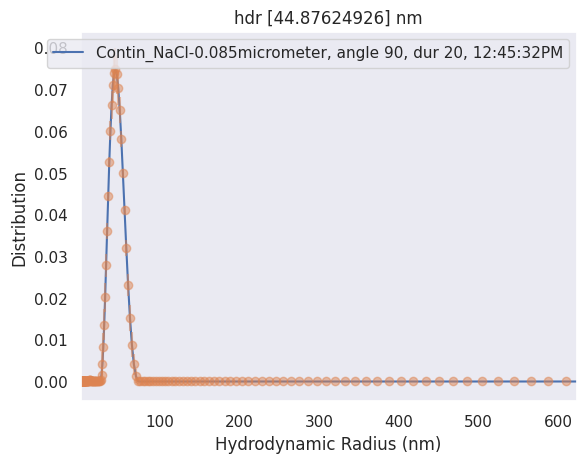

In [ ]:
config = dict(recalc=True,
        ptRangeSec=(5e-7, 1e0), fitRangeM=(1e-9, 1000e-9), gridpts=200,
        transformData=True, baselineCoeffs=0, # N_L
        # weighs noise level of data points accordinly for photon correlation spectroscopy
        # where the variance of Y is proportional to (Y**2+1)/(4*Y**2)
        # (from contin.for, line 1430)
        weighResiduals=True)
contin_test = contin_fit(path='/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.085micrometer - per_5_graden',angle = 90,continConfig=config,indices=1)
contin_test.run_contin()
contin_test.plot_contin_results()




In [ ]:
dfDistrib.to_csv('distribution_polybeads_85_nm.csv')

In [ ]:
dfFit.to_csv('fit_polybeads_85_nm.csv')

In [ ]:
varmap

{'temp': 291.62,
 'angle': 89.999,
 'visc': 0.0010401,
 'refrac': 1.332,
 'wavelen': 6.328e-07,
 'gamma': np.float64(7.184317054069262e-05),
 'dataFilename': PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/AutoSaveFileName0002.ASC')}

In [ ]:
import plotly.express as px

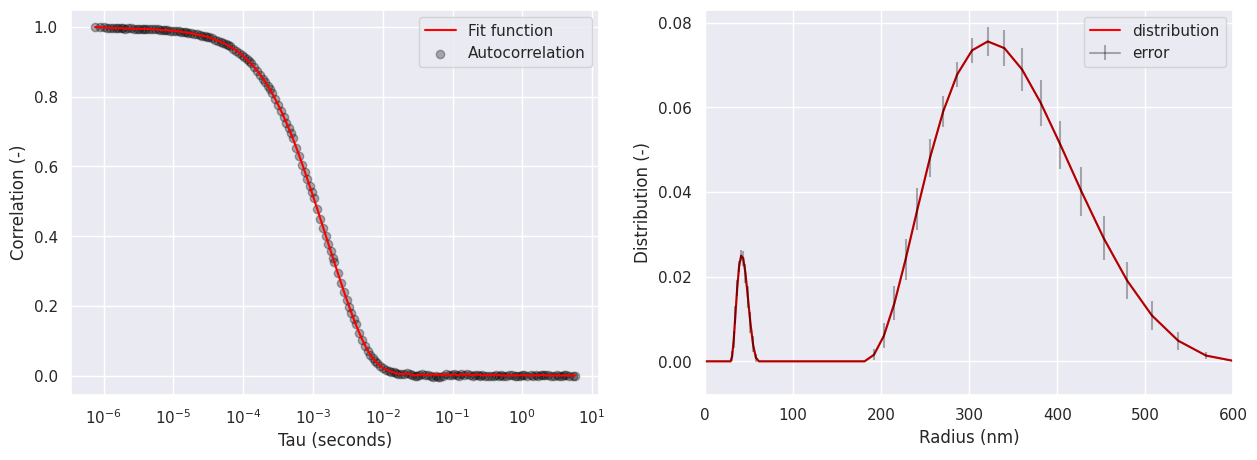

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
ax[1].plot(dfDistrib['radius(nm)'],dfDistrib['distrib'],color='red',label='distribution')
ax[1].set_xlim(0,600)
ax[1].errorbar(dfDistrib['radius(nm)'],dfDistrib['distrib'], dfDistrib['err'],color='black',alpha=0.3,label='error')
ax[1].legend()
ax[1].set_xlabel('Radius (nm)')
ax[1].set_ylabel('Distribution (-)')

ax[0].plot(dfFit['tau'], dfFit['corrFit'], color='red',label='Fit function')
ax[0].set_xscale('log')
ax[0].scatter(dfFit['tau'],dfFit['corrIn'],color='black',alpha=0.3,label='Autocorrelation')
ax[0].legend()
ax[0].set_xlabel('Tau (seconds)')
ax[0].set_ylabel('Correlation (-)')

fig.savefig('contin_fit_polybeads_85_nm.svg')

<ErrorbarContainer object of 3 artists>

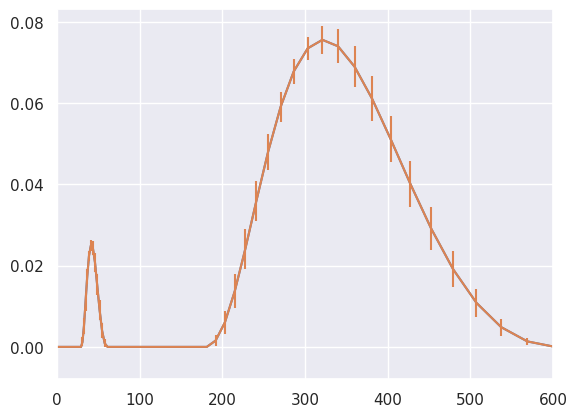

In [ ]:
plt.plot(dfDistrib['radius(nm)'],dfDistrib['distrib'])
plt.xlim(0,600)
plt.errorbar(dfDistrib['radius(nm)'],dfDistrib['distrib'], dfDistrib['err'],)

In [ ]:
contin_test = contin_fit(path='/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes',angle = 90,continConfig=config)

In [ ]:
contin_test.run_contin()

DEBUG CONTIN input: angle=89.999°, T=291.62043K, visc=1.04026 cp, λ=632.8 nmDEBUG CONTIN input: angle=89.999°, T=291.62198K, visc=1.04022 cp, λ=632.8 nmDEBUG CONTIN input: angle=89.999°, T=291.62405K, visc=1.04017 cp, λ=632.8 nmDEBUG CONTIN input: angle=89.999°, T=291.6235K, visc=1.04018 cp, λ=632.8 nmDEBUG CONTIN input: angle=89.999°, T=291.62506K, visc=1.04014 cp, λ=632.8 nm
DEBUG CONTIN input: angle=89.999°, T=291.62342K, visc=1.04018 cp, λ=632.8 nm
DEBUG CONTIN input: angle=89.999°, T=291.62634K, visc=1.04011 cp, λ=632.8 nmDEBUG CONTIN input: angle=89.999°, T=291.62743K, visc=1.04008 cp, λ=632.8 nmDEBUG CONTIN input: angle=89.999°, T=291.62576K, visc=1.04012 cp, λ=632.8 nm
DEBUG CONTIN input: angle=89.999°, T=291.62879K, visc=1.04005 cp, λ=632.8 nm
DEBUG q=1.870e+07  calc_const=2.053e-19 gamma_unit=7.183e-05
DEBUG q=1.870e+07  calc_const=2.053e-19 gamma_unit=7.184e-05



DEBUG q=1.870e+07  calc_const=2.054e-19 gamma_unit=7.184e-05DEBUG q=1.870e+07  calc_const=2.054e-19 gamma_unit=7

([PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:03:07PM'),
  PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:04:20PM'),
  PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:05:34PM'),
  PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:06:48PM'),
  PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:08:02PM'),
  PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60,

In [ ]:
df, fit, map = getContinResults(contin_test.resultDirs[1])














89.999 1.332 6.328e-07 291.62 0.0010402


In [ ]:
map

{'temp': 291.62,
 'angle': 89.999,
 'visc': 0.0010402,
 'refrac': 1.332,
 'wavelen': 6.328e-07,
 'gamma': np.float64(7.183626387173082e-05),
 'dataFilename': PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/AutoSaveFileName0001.ASC')}

In [ ]:
contin_test.resultDirs

[PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:03:07PM'),
 PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:04:20PM'),
 PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:05:34PM'),
 PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:06:48PM'),
 PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:08:02PM'),
 PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:09:

In [ ]:
contin_test.get_contin_result()


/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:03:07PM
89.999 1.332 6.328e-07 291.62 0.0010402
/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:04:20PM
89.999 1.332 6.328e-07 291.62 0.0010402
/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:05:34PM
89.999 1.332 6.328e-07 291.62 0.0010401
/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:06:48PM
89.999 1.332 6.328e-07 291.62 0.0010401
/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:08:02PM
89.999 1.332 6.328e-07 291.62 0.0010401
/home/thijssnel/programeren/jaar_4/

{'Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:03:07PM': (      radius(nm)   distrib           err
  9    1169.278867  0.000941  5.700000e-04
  10   1122.369787  0.001438  6.600000e-04
  11   1077.328449  0.002061  7.300000e-04
  12   1034.154855  0.002813  7.800000e-04
  13    992.705330  0.003689  8.000000e-04
  ..           ...       ...           ...
  188     0.768792  0.000000  1.600000e-19
  189     0.737902  0.000000  2.500000e-19
  190     0.708327  0.000000  2.700000e-19
  191     0.679916  0.000000  1.300000e-19
  192     0.652647  0.000000  1.100000e-19
  
  [184 rows x 3 columns],
                tau   corrFit    corrIn
  0    7.500000e-07  0.997641  0.997641
  1    8.750000e-07  0.998245  0.998244
  2    1.000000e-06  1.000000  1.000000
  3    1.125000e-06  0.991616  0.991616
  4    1.250000e-06  0.994450  0.994450
  ..            ...       ...       ...
  157  7.209000e-01  0.001814  0.001814
  158  7.864000e-01  0.002120  0.002120
  159  8.519000e-01  0.000008

In [ ]:
map

{'temp': 291.62,
 'angle': 89.999,
 'visc': 0.0010402,
 'refrac': 1.332,
 'wavelen': 6.328e-07,
 'gamma': np.float64(7.183626387173082e-05),
 'dataFilename': PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/AutoSaveFileName0001.ASC')}

/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:03:07PM
89.999 1.332 6.328e-07 291.62 0.0010402
/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:04:20PM
89.999 1.332 6.328e-07 291.62 0.0010402
/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:05:34PM
89.999 1.332 6.328e-07 291.62 0.0010401
/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:06:48PM
89.999 1.332 6.328e-07 291.62 0.0010401
/home/thijssnel/programeren/jaar_4/technische_stage/Polydisperse - alle groottes/solution/Contin_NaCl-85,465,990nm-90graden, angle 90, dur 60, 3:08:02PM
89.999 1.332 6.328e-07 291.62 0.0010401
/home/thijssnel/programeren/jaar_4/

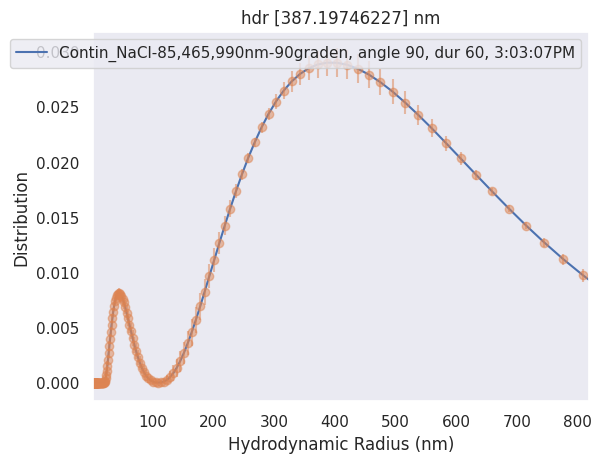

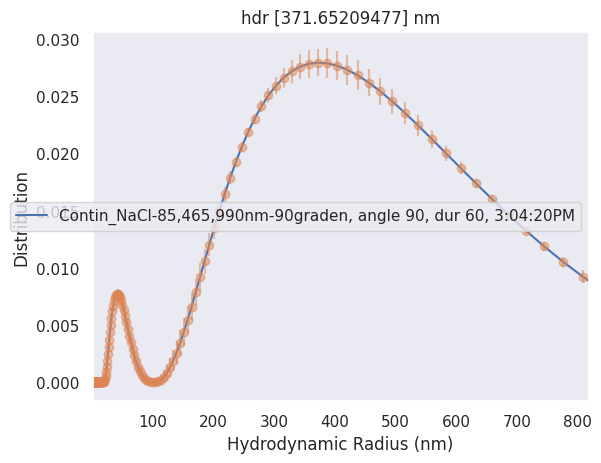

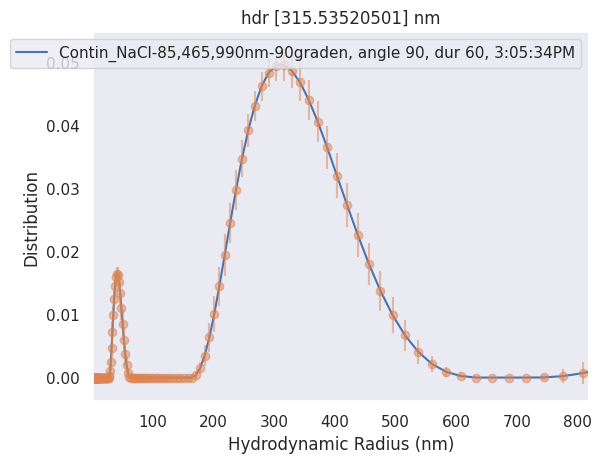

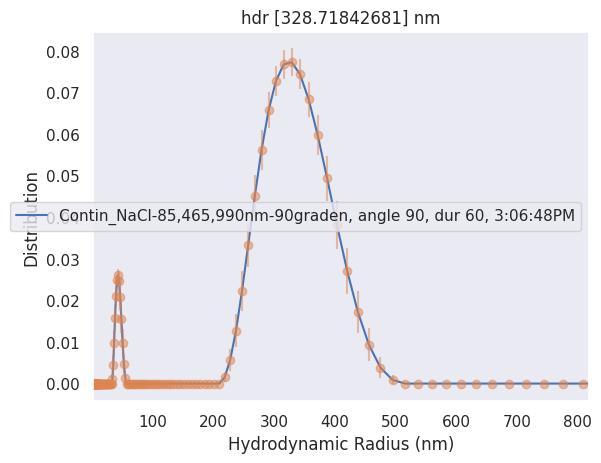

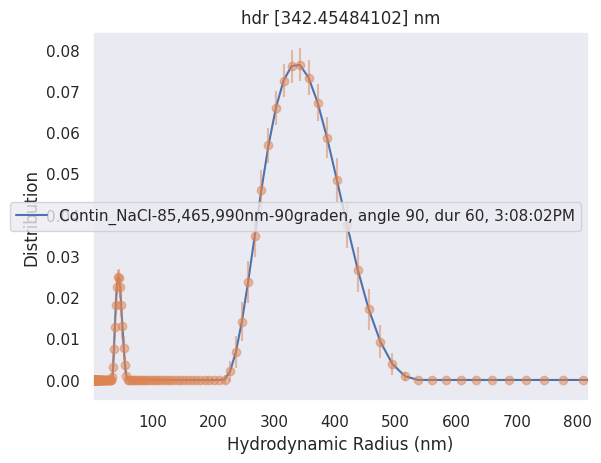

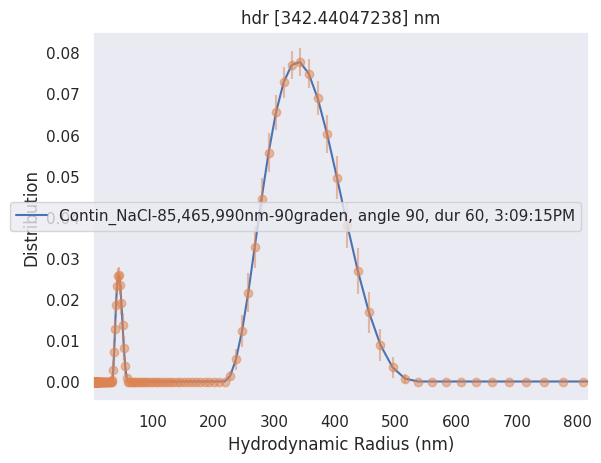

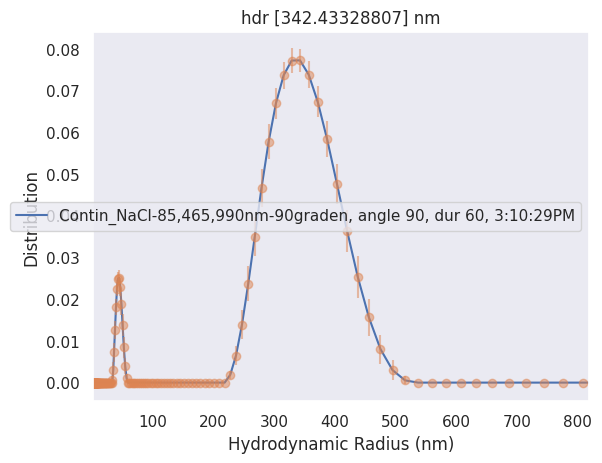

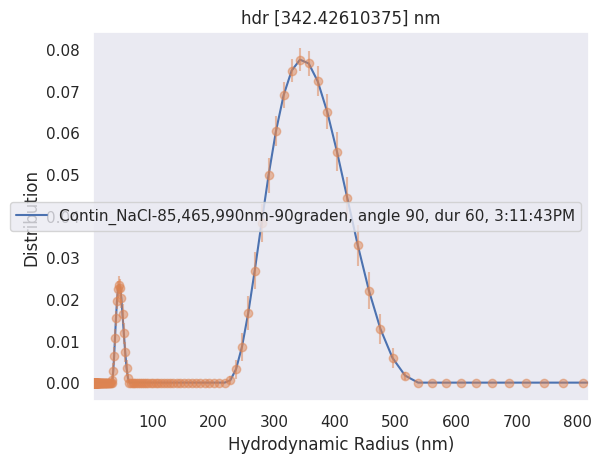

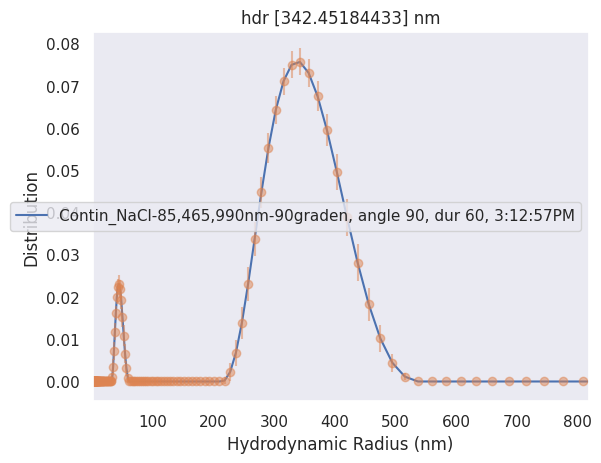

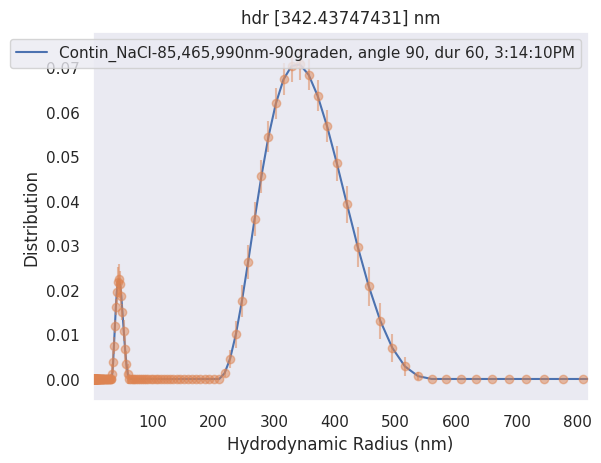

In [ ]:
contin_test.plot_contin_results()

In [ ]:
voorbeeld = dls_sls_analysis('/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - v2')

In [ ]:
voorbeeld.sample_names

['log0-nacl-90gr',
 'log0-nacl-90gr-meting2',
 'log1-nacl-90gr',
 'naclsolvent',
 'standaard_cal']

In [ ]:
continConfig = dict(recalc=True,
    ptRangeSec=(5e-7, 1e1), fitRangeM=(1e-9, 1000e-9), gridpts=200,
    transformData=True, baselineCoeffs=0, # N_L
    # weighs noise level of data points accordinly for photon correlation spectroscopy
    # where the variance of Y is proportional to (Y**2+1)/(4*Y**2)
    # (from contin.for, line 1430)
    weighResiduals=1
)

In [ ]:
continConfig['weighResiduals']

1

In [ ]:
lst = [i for i in voorbeeld.get_data(data_type='solution').items()]

resultDirs, summary = runContinOverFiles(lst, continConfig)


DEBUG CONTIN input: angle=90.003°, T=292.46454K, visc=1.01874 cp, λ=632.8 nmDEBUG CONTIN input: angle=89.999°, T=292.4682K, visc=1.01865 cp, λ=632.8 nmDEBUG CONTIN input: angle=89.999°, T=292.46972K, visc=1.01861 cp, λ=632.8 nmDEBUG CONTIN input: angle=89.999°, T=292.47427K, visc=1.0185 cp, λ=632.8 nmDEBUG CONTIN input: angle=89.999°, T=292.47233K, visc=1.01855 cp, λ=632.8 nm
DEBUG CONTIN input: angle=89.999°, T=292.4814K, visc=1.01832 cp, λ=632.8 nmDEBUG CONTIN input: angle=89.999°, T=292.47879K, visc=1.01838 cp, λ=632.8 nm
DEBUG CONTIN input: angle=89.999°, T=292.47696K, visc=1.01843 cp, λ=632.8 nm
DEBUG CONTIN input: angle=89.999°, T=292.48362K, visc=1.01826 cp, λ=632.8 nm

DEBUG CONTIN input: angle=89.999°, T=292.48502K, visc=1.01823 cp, λ=632.8 nmDEBUG CONTIN input: angle=89.999°, T=292.61106K, visc=1.01507 cp, λ=632.8 nmDEBUG CONTIN input: angle=89.999°, T=292.61282K, visc=1.01503 cp, λ=632.8 nmDEBUG q=1.870e+07  calc_const=2.103e-19 gamma_unit=7.357e-05

DEBUG CONTIN input: angl

In [ ]:
summary

'CONTIN analysis with 16 threads took 3.7s.'

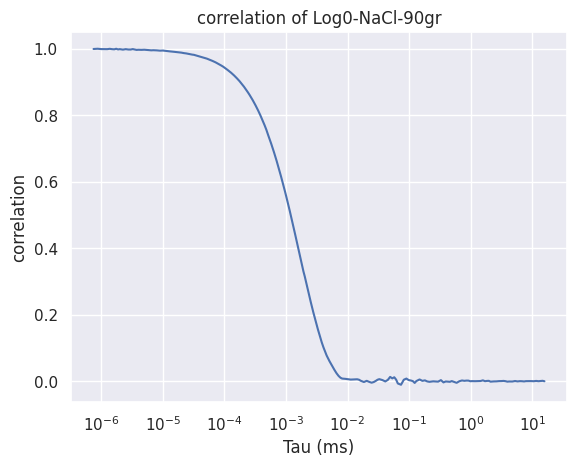

In [ ]:
lst[0][1].quick_plot_cor()

In [ ]:
**None

SyntaxError: invalid syntax (2612350234.py, line 1)

In [ ]:
resultDirs

[PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - v2/solution/Contin_Log0-NaCl-90gr, angle 90, dur 60, 2:11:14PM'),
 PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - v2/solution/Contin_Log0-NaCl-90gr, angle 90, dur 60, 2:13:14PM'),
 PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - v2/solution/Contin_Log0-NaCl-90gr, angle 90, dur 60, 2:14:26PM'),
 PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - v2/solution/Contin_Log0-NaCl-90gr, angle 90, dur 60, 2:15:48PM'),
 PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - v2/solution/Contin_Log0-NaCl-90gr, angle 90, dur 60, 2:17:01PM'),
 PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - v2/solution/Contin_Log0-NaCl-90gr, angle 90, dur 60, 2:18:13PM'),
 PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - v2/solution/Contin_Log0-NaCl-90gr, angle 90, dur 60, 2:19:26PM'),
 PosixPath('/home/thijssnel/programeren/j

[249.42007428]


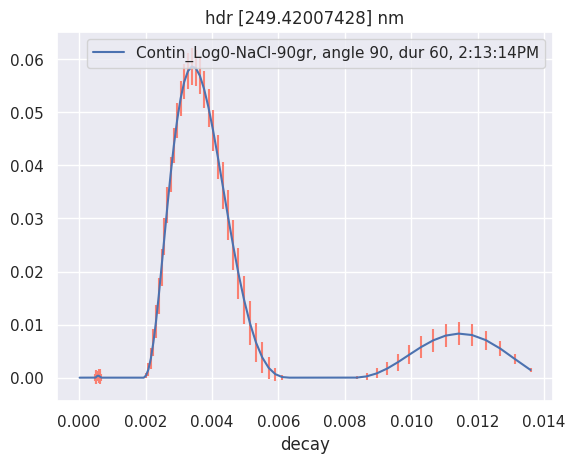

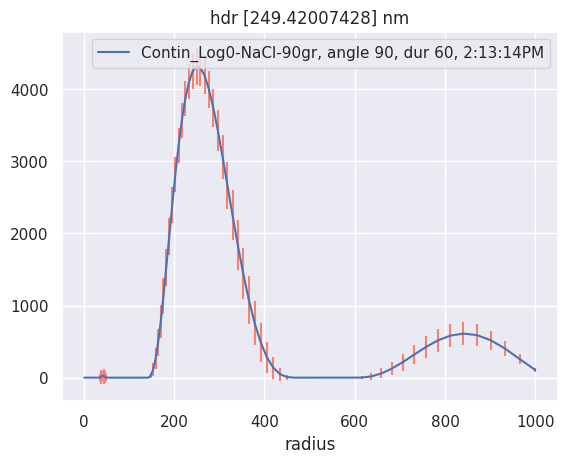

In [ ]:
dn = resultDirs[1]
dfDistribDecay, dfFit, varmap = getContinResults(dn)
dfDistribRadius = dfDistribDecay.rename(columns={'decay': 'radius'})
# does gamma need to be doubled? Due to: G2(t)-1 = g1(t)^2 = exp(-t*gamma)^2
dfDistribRadius *= varmap["gamma"]
# Plot decay time distribution
plotargs = dict(yerr='err', ecolor='salmon', grid=True, label=dn.name, title = f'hdr {dfDistribRadius['radius'][dfDistribRadius['distrib']==max(dfDistribRadius['distrib'])].values*1e9} nm')
dfDistribDecay.plot('decay', 'distrib', **plotargs);
# Plot radius distribution, convert DataFrame first
dfDistribRadius = dfDistribDecay.rename(columns={'decay': 'radius'})
# does gamma need to be doubled? Due to: G2(t)-1 = g1(t)^2 = exp(-t*gamma)^2
dfDistribRadius *= varmap["gamma"]*1e9
dfDistribRadius.plot('radius', 'distrib', **plotargs);
varmap

print(dfDistribRadius['radius'][dfDistribRadius['distrib']==max(dfDistribRadius['distrib'])].values)

In [ ]:
varmap

{'temp': 292.18,
 'angle': 54.998,
 'visc': 0.0010257,
 'refrac': 1.332,
 'wavelen': 6.328e-07,
 'gamma': np.float64(3.112383204795771e-05),
 'dataFilename': PosixPath('/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.99micrometer - per_5_graden/solution/AutoSaveFileName0080.ASC')}

In [ ]:
deg = sp.symbols('deg')

f = (4 * sp.pi * 1.332/6.328e-7 * sp.sin(sp.rad(sp.Symbol('x'))/2))**2

# convert to numeric function
f_num = sp.lambdify(sp.Symbol('x'), f, 'numpy')

total_sum_count = []
total_mean_count = []
total_diode = []
total_angle = []
total_wavelengths = []
total_gamma = []
total_q = []
total_q_real = []
total_hrs = []

mean_sum_count = []
mean_diode = []
mean_angle = []
mean_gamma = []
mean_mean_count = []
mean_q = []
mean_q_real = []
mean_hrs = []

std_gamma = []




for indx1, i in enumerate(voorbeeld.sample_angles):
    x = voorbeeld.get_data(angle=i, data_type='solution')
    count_sum = []
    count_mean = []
    diode = []
    gamma = []
    q = []
    q_real=[]
    hrs = []

    for indx2, data in enumerate(x.values()):
        _,g = data.fit()


        total_q.append(data.q**2)
        total_angle.append(i)
        total_sum_count.append(np.sum(data.CountRatey)*1000)
        total_mean_count.append(np.mean(data.CountRatey)*1000)
        total_diode.append(data.MonitorDiode)
        total_wavelengths.append(data.Wavelength_nm)
        total_gamma.append(g)
        total_q_real.append(data.real_q**2)


        count_sum.append(np.sum(data.CountRatey)*1000)
        count_mean.append(np.mean(data.CountRatey)*1000)
        diode.append(data.MonitorDiode)
        gamma.append(g)
        q_real.append(data.real_q**2)
        q.append(data.q**2)

        data.tikhonov_Phillips_fit()

        hrs.append(data.hrs[data.contributionsGuess==max(data.contributionsGuess)])
        total_hrs.append(data.hrs[data.contributionsGuess==max(data.contributionsGuess)])
        print(f"{indx2+1}/{len(x)} of angel {indx1}/{len(voorbeeld.sample_angles)}")
        

    mean_diode.append(np.mean(diode))
    mean_mean_count.append(np.mean(count_mean))
    mean_sum_count.append(np.mean(count_sum))
    mean_angle.append(i)
    mean_gamma.append(np.mean(gamma))
    std_gamma.append(np.std(gamma))
    mean_q.append(np.mean(q))
    mean_q_real.append(np.mean(q_real))
    # mean_hrs.append(np.mean(hrs))

dataframe = pd.DataFrame({'angle' :total_angle,
                          'gamma' : total_gamma})
dataframe['q^2'] = f_num(dataframe['angle'])

total_gamma_norm = total_gamma/max(total_gamma)
total_q_norm = total_q/max(total_q)
mean_gamma_norm = mean_gamma/max(mean_gamma)
mean_q_norm = mean_q/max(mean_q)


AttributeError: 'read_asc' object has no attribute 'real_q'

In [ ]:
total_hrs

[array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([44.16564386]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.

In [ ]:
import numpy, scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([2])

    def sinfunc(t, s):  return numpy.sin(t/2)**s
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    s = popt
    fitfunc = lambda t: numpy.sin(t/2)**s 
    
    return {'power':s, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

In [ ]:

coef = fit_sin(np.deg2rad(total_angle), total_gamma_norm)

/home/thijssnel/programeren/.venv/lib/python3.12/site-packages/numpy/fft/_helper.py:167: RuntimeWarning: divide by zero encountered in scalar divide
  val = 1.0 / (n * d)
/home/thijssnel/programeren/.venv/lib/python3.12/site-packages/numpy/fft/_helper.py:174: RuntimeWarning: invalid value encountered in multiply
  return results * val


In [ ]:
coef

{'power': array([1.93030828]),
 'fitfunc': <function __main__.fit_sin.<locals>.<lambda>(t)>,
 'maxcov': np.float64(0.0001022747376072705),
 'rawres': (array([2]), array([1.93030828]), array([[0.00010227]]))}

In [ ]:
dataframe

,angle,gamma,q^2
0,100,1934.900858,4.105851e+14
1,100,1941.133603,4.105851e+14
2,100,1944.884205,4.105851e+14
3,100,1941.346012,4.105851e+14
4,100,1933.620309,4.105851e+14
...,...,...,...
285,95,1807.225111,3.803269e+14
286,95,1807.140077,3.803269e+14
287,95,1806.657383,3.803269e+14
288,95,1806.402975,3.803269e+14


/tmp/ipykernel_31311/2326223277.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.plot(x_vals, y_vals, color='red', label='fit: sin(x/2)^%.2f' % coef['power'])


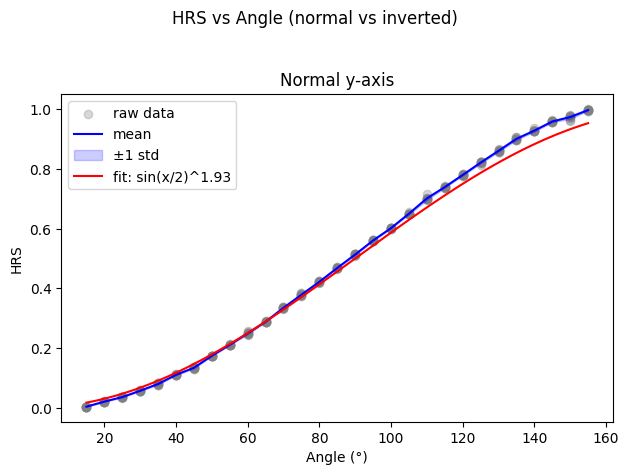

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- your dataframe setup ---
hrs_dataframe = pd.DataFrame({'angle': total_angle, 'gamma': total_gamma_norm})
hrs_dataframe['mean'] = hrs_dataframe.groupby('angle')['gamma'].transform('mean')

# flatten list/array elements
hrs_dataframe['mean'] = hrs_dataframe['mean'].apply(
    lambda x: x[0] if isinstance(x, (list, np.ndarray)) else x
)

hrs_dataframe['std'] = hrs_dataframe.groupby('angle')['gamma'].transform('std')

# collapse to one row per angle
plot_df = hrs_dataframe.groupby('angle', as_index=False).agg({'mean': 'first', 'std': 'first'})
plot_df = plot_df.sort_values('angle')
plot_df = plot_df.apply(pd.to_numeric, errors='coerce').dropna()

# --- create figure and two subplots ---
fig, ax = plt.subplots(1, 1, sharex=True)
deg = sp.symbols('deg')

f = (sp.sin(sp.rad(sp.Symbol('x'))/2))**2
# convert to numeric function
f_num = sp.lambdify(sp.Symbol('x'), f, 'numpy')

# make x-values
x_vals = np.linspace(15, 155, len(mean_angle))

# compute y-values
y_vals = f_num(x_vals)


ax.scatter(hrs_dataframe['angle'], hrs_dataframe['gamma'],
            color='gray', alpha=0.3, label='raw data')

# mean line
ax.plot(plot_df['angle'], plot_df['mean'], color='blue', label='mean')

# ±1 std band
ax.fill_between(plot_df['angle'],
                plot_df['mean'] - plot_df['std'],
                plot_df['mean'] + plot_df['std'],
                color='blue', alpha=0.2, label='±1 std')
    
ax.plot(x_vals, y_vals, color='red', label='fit: sin(x/2)^%.2f' % coef['power'])
ax.set_title('Normal y-axis')

ax.set_xlabel('Angle (°)')
ax.set_ylabel('HRS')
ax.legend()

plt.suptitle('HRS vs Angle (normal vs inverted)')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

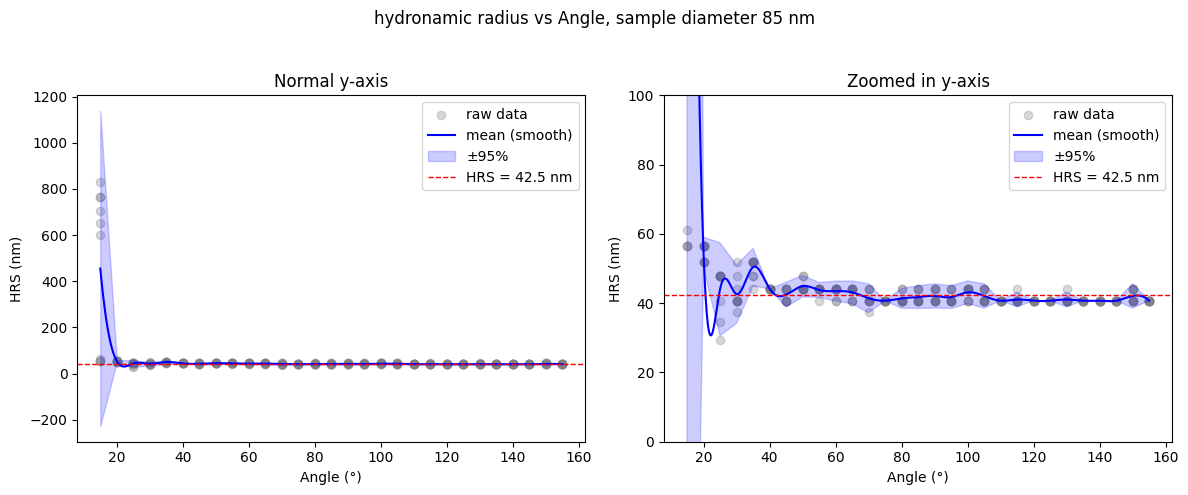

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

# --- your dataframe setup ---
hrs_dataframe = pd.DataFrame({'angle': total_angle, 'hrs': total_hrs})
hrs_dataframe['mean'] = hrs_dataframe.groupby('angle')['hrs'].transform('mean')

# flatten list/array elements
hrs_dataframe['mean'] = hrs_dataframe['mean'].apply(
    lambda x: x[0] if isinstance(x, (list, np.ndarray)) else x
)

hrs_dataframe['std'] = hrs_dataframe.groupby('angle')['hrs'].transform('std')

# collapse to one row per angle
plot_df = hrs_dataframe.groupby('angle', as_index=False).agg({'mean': 'first', 'std': 'first'})
plot_df = plot_df.sort_values('angle')
plot_df = plot_df.apply(pd.to_numeric, errors='coerce').dropna()

# --- smooth interpolation of mean ---
x = plot_df['angle'].values
y = plot_df['mean'].values
x_smooth = np.linspace(x.min(), x.max(), 400)
y_smooth = make_interp_spline(x, y, k=3)(x_smooth)  # cubic spline

# --- create figure and two subplots ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

for ax, invert in zip(axes, [False, True]):
    # raw data
    ax.scatter(hrs_dataframe['angle'], hrs_dataframe['hrs'],
               color='gray', alpha=0.3, label='raw data')

    # smooth mean line
    ax.plot(x_smooth, y_smooth, color='blue', label='mean (smooth)')

    # ±1 std band (still linear)
    ax.fill_between(plot_df['angle'],
                    plot_df['mean'] - plot_df['std']*1.96,
                    plot_df['mean'] + plot_df['std']*1.96,
                    color='blue', alpha=0.2, label='±95%')

    # hline at 500
    ax.axhline(85/2, color='red', linestyle='--', linewidth=1, label=f'HRS = {85/2} nm')

    # invert y if requested
    if invert:
        ax.set_ylim(0, 100)
        ax.set_title('Zoomed in y-axis')
    else:
        ax.set_title('Normal y-axis')

    ax.set_xlabel('Angle (°)')
    ax.set_ylabel('HRS (nm)')
    ax.legend()

plt.suptitle(f'hydronamic radius vs Angle, sample diameter {85} nm')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
total_hrs

[array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([44.16564386]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([44.16564386]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.70790474]),
 array([40.

In [ ]:
hrs_dataframe.groupby('angle')['mean']

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (29, 2) + inhomogeneous part.

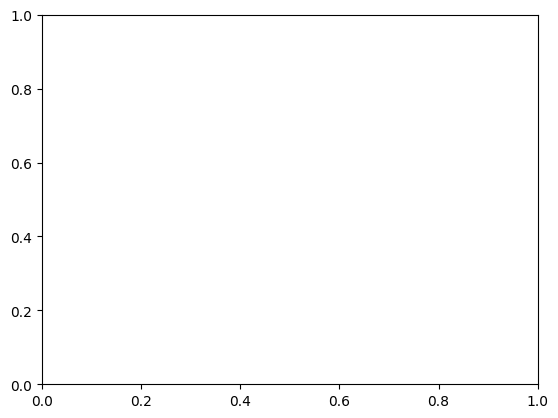

In [ ]:
hrs
plt.plot(hrs_dataframe.groupby(['angle'])['angle'],hrs_dataframe.groupby(['angle'])['hrs'].mean(),'.')
plt.fill_between(hrs_dataframe['angle'], hrs_dataframe['mean']-hrs_dataframe['std'], hrs_dataframe['mean']+hrs_dataframe['std'], color='gray', alpha=0.5)   

ValueError: x and y must have same first dimension, but have shapes (290,) and (0,)

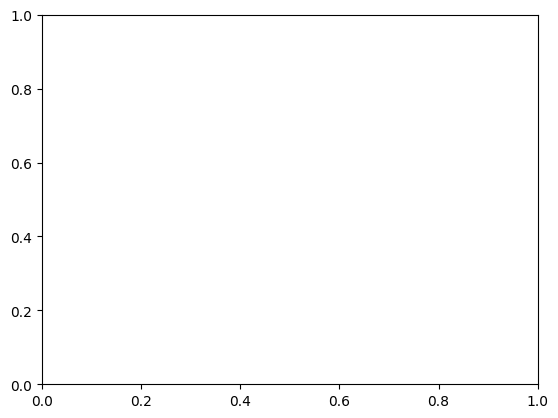

In [ ]:
plt.plot(total_angle, total_hrs,'.')
plt.ylim(0, 1000)
plt.hlines(500, color='red',xmin=-10, xmax=180)
plt.xlim(10,160)

Text(0, 0.5, 'gamma (1/s)')

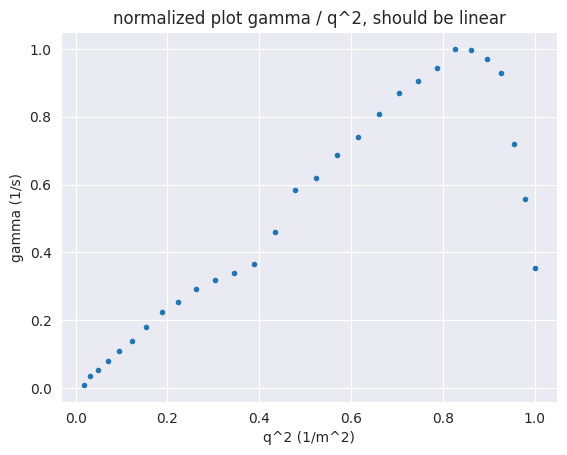

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
plt.plot(np.array(mean_q_norm), np.array(mean_gamma_norm),'.')
plt.title('normalized plot gamma / q^2, should be linear')
plt.xlabel('q^2 (1/m^2)')
plt.ylabel('gamma (1/s)')


<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:3: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:3: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipykernel_27658/2896327388.py:2: SyntaxWarning: invalid escape sequence '\G'
  plt.plot(mean_angle, mean_gamma_norm, '.',label='normalized decay time $\Gamma$(1/s)')
/tmp/ipykernel_27658/2896327388.py:3: SyntaxWarning: invalid escape sequence '\G'
  plt.fill_between(mean_angle, np.array(mean_gamma_norm)-np.array(std_gamma), np.array(mean_gamma_norm)+np.array(std_gamma), color='gray', alpha=0.5, label='std dev $\Gamma$')


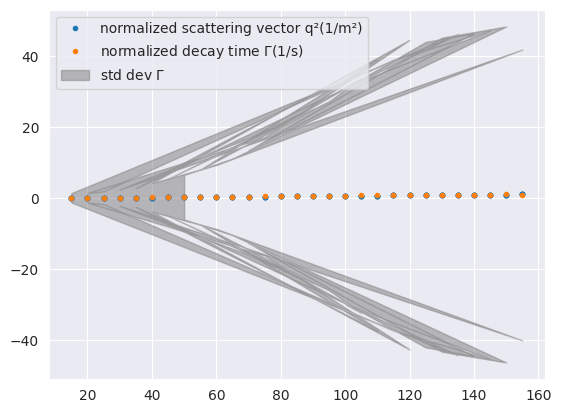

In [ ]:
plt.plot(total_angle, total_q_norm, '.', label ='normalized scattering vector q²(1/m²)')
plt.plot(mean_angle, mean_gamma_norm, '.',label='normalized decay time $\Gamma$(1/s)')
plt.fill_between(mean_angle, np.array(mean_gamma_norm)-np.array(std_gamma), np.array(mean_gamma_norm)+np.array(std_gamma), color='gray', alpha=0.5, label='std dev $\Gamma$')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# --- assuming you already have these arrays ---
# total_angle, total_q_norm
# mean_angle, mean_gamma_norm, std_gamma

# sort the data (important for interpolation)
sort_idx = np.argsort(mean_angle)
mean_angle_sorted = np.array(mean_angle)[sort_idx]
mean_gamma_norm_sorted = np.array(mean_gamma_norm)[sort_idx]
std_gamma_sorted = np.array(std_gamma)[sort_idx]

# --- smooth interpolation for the mean ---
x = mean_angle_sorted
y = mean_gamma_norm_sorted
x_smooth = np.linspace(x.min(), x.max(), 400)
y_smooth = make_interp_spline(x, y, k=3)(x_smooth)  # cubic spline smoothing

# --- smooth interpolation for ±std bounds (optional) ---
y_upper = make_interp_spline(x, y + std_gamma_sorted, k=3)(x_smooth)
y_lower = make_interp_spline(x, y - std_gamma_sorted, k=3)(x_smooth)

# --- plot ---
plt.figure(figsize=(8,5))

# raw data
plt.plot(total_angle, total_q_norm, '.', color='tab:blue',
         label='normalized scattering vector $q^2$ (1/m²)')

# mean points
plt.plot(mean_angle_sorted, mean_gamma_norm_sorted, '.', color='tab:orange',
         label='normalized decay rate $\\Gamma$ (1/s)')

# smooth mean line
plt.plot(x_smooth, y_smooth, color='tab:orange', linewidth=2)

# shaded ±std band (smoothed)
plt.fill_between(x_smooth, y_lower, y_upper,
                 color='tab:orange', alpha=0.3, label='±1σ $\\Gamma$')

# cosmetics
plt.xlabel('Angle (°)')
plt.ylabel('Normalized Value')
plt.title('Normalized Decay Rate $\\Gamma$ vs. Scattering Vector $q^2$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


ValueError: Array must not contain infs or nans.

<>:24: SyntaxWarning: invalid escape sequence '\G'
<>:24: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipykernel_4987/1992262409.py:24: SyntaxWarning: invalid escape sequence '\G'
  ax1.plot(total_angle, total_gamma_norm,'.', color = 'blue', label='decay rate ($\Gamma$)')


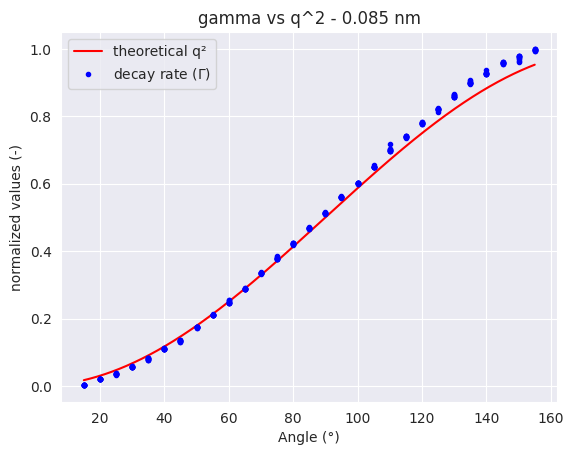

In [ ]:
sns.set_style('darkgrid')
deg = sp.symbols('deg')

f = (sp.sin(sp.rad(sp.Symbol('x'))/2))**2
angle =np.array([np.arccos(np.dot(np.array([  0.02429111, -0.70689813,  0.70689813]),
                                                       np.array([np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle)), 0]))) for angle in mean_angle])
# convert to numeric function
f_num = sp.lambdify(sp.Symbol('x'), f, 'numpy')

# make x-values
x_vals = np.linspace(15, 155, 1000)

# compute y-values
y_vals = f_num(np.array(x_vals))
fig, ax1 = plt.subplots()

# # plot
# ax1.plot(angle, mean_diode, '.')
# # ax2 = ax1.twinx()
ax1.plot(x_vals, y_vals, color = 'red',label = 'theoretical q²')
ax1.set_ylabel('normalized values (-)')
ax1.set_xlabel('Angle (°)')
# ax2 = ax1.twinx()
ax1.plot(total_angle, total_gamma_norm,'.', color = 'blue', label='decay rate ($\Gamma$)')
# ax2.plot(total_angle, total_q_norm**2,'.', color = 'green', label='scattering vector^2')
# ax1.set_ylabel('decay rate correlation (1/s)')
ax1.legend()
ax1.set_title('gamma vs q^2 - 0.085 nm')
plt.show()


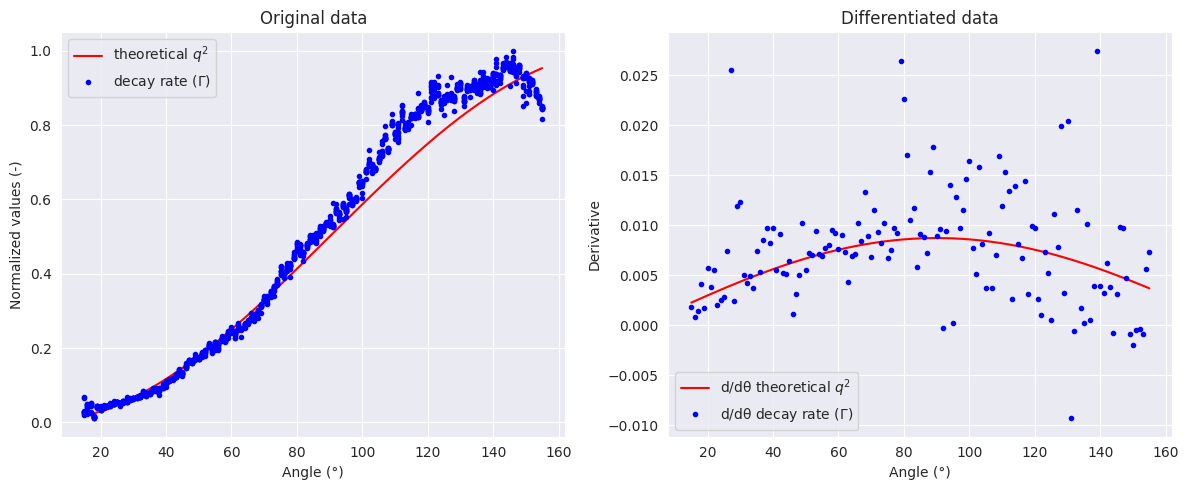

In [ ]:
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

# symbolic definition
x = sp.Symbol('x')
f = (sp.sin(sp.rad(x)/2))**2
f_num = sp.lambdify(x, f, 'numpy')

# x and y values
x_vals = np.linspace(15, 155, 1000)
y_vals = f_num(x_vals)

# Example data (replace with your real ones)
# mean_angle, total_angle, total_gamma_norm should be defined already


# angle conversion example
# angle = np.array([
#     np.arccos(np.dot(
#         np.array([0.02429111, -0.70689813, 0.70689813]),
#         np.array([np.cos(np.deg2rad(a)), np.sin(np.deg2rad(a)), 0])
#     )) for a in mean_angle
# ])

# numerical derivatives
dy_dx_theoretical = np.gradient(y_vals, x_vals)
dy_dx_experimental = np.gradient(mean_gamma_norm, mean_angle)

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# ---- Left subplot: original ----
ax1.plot(x_vals, y_vals, color='red', label='theoretical $q^2$')
ax1.plot(total_angle, total_gamma_norm, '.', color='blue', label='decay rate ($\\Gamma$)')
ax1.set_xlabel('Angle (°)')
ax1.set_ylabel('Normalized values (-)')
ax1.legend()
ax1.set_title('Original data')

# ---- Right subplot: derivatives ----
ax2.plot(x_vals, dy_dx_theoretical, color='red', label='d/dθ theoretical $q^2$')
ax2.plot(mean_angle, dy_dx_experimental,'.', color='blue', label='d/dθ decay rate ($\\Gamma$)')
ax2.set_xlabel('Angle (°)')
ax2.set_ylabel('Derivative')
ax2.legend()
ax2.set_title('Differentiated data')

plt.tight_layout()
plt.show()


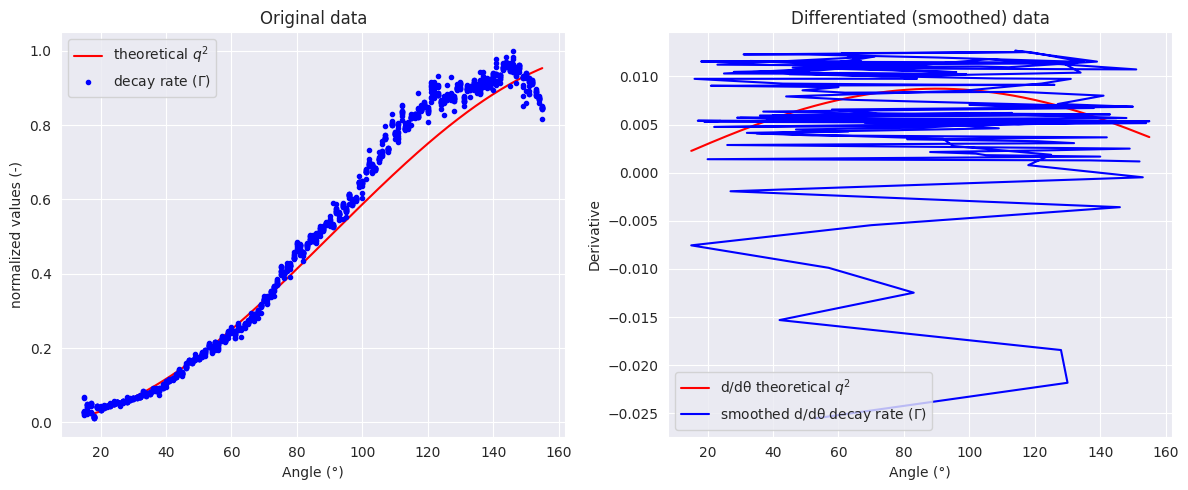

In [ ]:
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

sns.set_style('darkgrid')

# --- Symbolic theoretical function ---
x = sp.Symbol('x')
f = (sp.sin(sp.rad(x)/2))**2
f_num = sp.lambdify(x, f, 'numpy')

# --- Real data (replace these with your actual ones) ---
# Assuming you already have mean_angle, mean_gamma_norm, total_angle, total_gamma_norm
# Example placeholders for structure:
# mean_angle = np.linspace(15, 155, 200)
# mean_gamma_norm = f_num(mean_angle) + 0.05*np.random.randn(len(mean_angle))
# total_angle = mean_angle
# total_gamma_norm = mean_gamma_norm
df = pd.DataFrame({'angle': mean_angle, 'gamma': mean_gamma_norm})
df = df.sort_values('angle', ascending=False).reset_index(drop=True)
# --- Compute derivatives ---
x_vals = np.linspace(15, 155, 1000)
y_vals = f_num(x_vals)
dy_dx_theoretical = np.gradient(y_vals, x_vals)
dy_dx_experimental = np.gradient(df['gamma'], df['angle'])

# --- Smooth the experimental derivative using Savitzky–Golay filter ---
# window_length must be odd and < len(mean_angle)
window = min(51, len(mean_angle) // 2 * 2 + 1)
dy_dx_exp_smooth = savgol_filter(dy_dx_experimental, window_length=window, polyorder=3)

# --- Create subplots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# Left subplot: original (unchanged)
ax1.plot(x_vals, y_vals, color='red', label='theoretical $q^2$')
ax1.plot(total_angle, total_gamma_norm, '.', color='blue', label='decay rate ($\\Gamma$)')
ax1.set_xlabel('Angle (°)')
ax1.set_ylabel('normalized values (-)')
ax1.legend()
ax1.set_title('Original data')

# Right subplot: derivatives (smooth mean line)
ax2.plot(x_vals, dy_dx_theoretical, color='red', label='d/dθ theoretical $q^2$')
ax2.plot(mean_angle, dy_dx_exp_smooth, color='blue', label='smoothed d/dθ decay rate ($\\Gamma$)')
ax2.set_xlabel('Angle (°)')
ax2.set_ylabel('Derivative')
ax2.legend()
ax2.set_title('Differentiated (smoothed) data')

plt.tight_layout()
plt.show()


/home/thijssnel/programeren/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/thijssnel/programeren/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/thijssnel/programeren/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/thijssnel/programeren/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/thijssnel/programeren/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/thijssnel/programeren/.venv/lib/python3.12/site-packages/nu

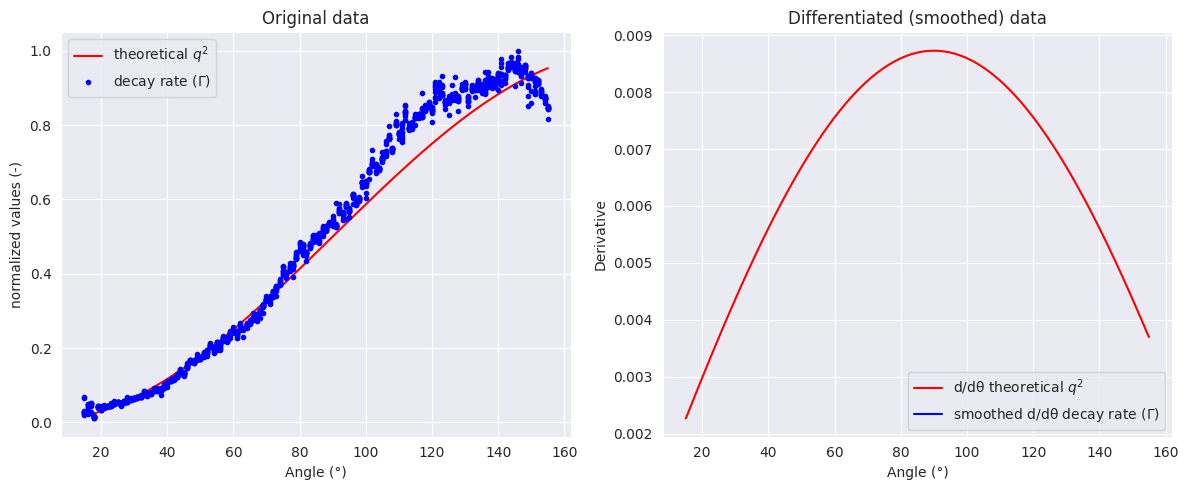

In [ ]:
import numpy as np
import pandas as pd
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

sns.set_style('darkgrid')

# --- Symbolic theoretical function ---
x = sp.Symbol('x')
f = (sp.sin(sp.rad(x)/2))**2
f_num = sp.lambdify(x, f, 'numpy')

# --- Your real data ---
# (Replace these with your actual arrays)
# mean_angle, mean_gamma_norm, total_angle, total_gamma_norm

# ---- Sort experimental data by angle ----
df = pd.DataFrame({'angle': total_angle, 'gamma': total_gamma_norm})
df = df.sort_values('angle').reset_index(drop=True)
mean_angle_sorted = df['angle'].values
mean_gamma_sorted = df['gamma'].values

# ---- Compute derivatives ----
x_vals = np.linspace(15, 155, 1000)
y_vals = f_num(x_vals)
dy_dx_theoretical = np.gradient(y_vals, x_vals)
dy_dx_experimental = np.gradient(mean_gamma_sorted, mean_angle_sorted)

# ---- Smooth derivative to get mean line ----
window = min(51, len(mean_angle_sorted) // 2 * 2 + 1)
dy_dx_exp_smooth = savgol_filter(dy_dx_experimental, window_length=window, polyorder=3)

# ---- Create subplots ----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# --- Left subplot: Original data (unchanged) ---
ax1.plot(x_vals, y_vals, color='red', label='theoretical $q^2$')
ax1.plot(total_angle, total_gamma_norm, '.', color='blue', label='decay rate ($\\Gamma$)')
ax1.set_xlabel('Angle (°)')
ax1.set_ylabel('normalized values (-)')
ax1.legend()
ax1.set_title('Original data')

# --- Right subplot: Differentiated and smoothed ---
ax2.plot(x_vals, dy_dx_theoretical, color='red', label='d/dθ theoretical $q^2$')
ax2.plot(mean_angle_sorted, dy_dx_exp_smooth, color='blue', label='smoothed d/dθ decay rate ($\\Gamma$)')
ax2.set_xlabel('Angle (°)')
ax2.set_ylabel('Derivative')
ax2.legend()
ax2.set_title('Differentiated (smoothed) data')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from scipy.optimize import least_squares

def ks_from_phi(phi, theta0):
    return np.array([np.sin(theta0)*np.cos(phi),
                     np.sin(theta0)*np.sin(phi),
                     np.cos(theta0)])

def ki_from_alpha(ax, ay):
    v = np.array([ax, ay, 1.0])
    return v / np.linalg.norm(v)

def q_from_ki_ks(ki, ks):
    cos_th = np.clip(np.dot(ki, ks), -1.0, 1.0)
    th = np.arccos(cos_th)
    return np.sin(th/2.0)**2

# normalized Gamma and normalized q^2 residuals
Gamma_norm = total_gamma_norm 

def residuals_alpha(p):
    ax, ay = p
    ki = ki_from_alpha(ax, ay)
    q2 = np.array([q_from_ki_ks(ki, ks_from_phi(ph, 90)) for ph in total_angle])
    return q2 - Gamma_norm
p0 = [-0.03014977056384224, -0.021516462498596633]
res = least_squares(residuals_alpha, p0, bounds=([-1,-1],[1,1]))
ax_fit, ay_fit = res.x
print("fitted tilt (ax,ay) in degrees approx:", [ax_fit, ay_fit])
print(ki_from_alpha(ax_fit, ay_fit))


fitted tilt (ax,ay) in degrees approx: [np.float64(0.9999999999999337), np.float64(0.9999999999999999)]
[0.57735027 0.57735027 0.57735027]


In [ ]:
print(res)

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 6.237e-01  6.151e-01 ...  3.018e-01  2.513e-01]
           x: [ 1.000e+00  1.000e+00]
        cost: 17.17438060553245
         jac: [[ 1.435e-01 -2.203e-01]
               [ 1.435e-01 -2.203e-01]
               ...
               [-2.317e-01  8.504e-02]
               [-2.317e-01  8.504e-02]]
        grad: [-2.941e-01 -6.486e-01]
  optimality: 1.9495892014400135e-14
 active_mask: [1 1]
        nfev: 41
        njev: 41


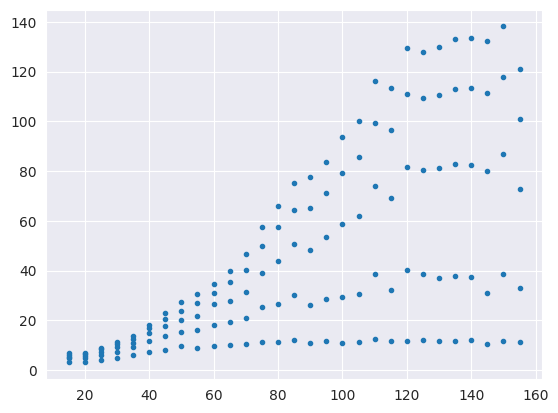

In [ ]:
plt.plot(total_angle,total_gamma,'.')

In [ ]:
[  0.02429111, -0.70689813,  0.70689813]
[ 0.54030231, -0.84147098,  0.        ]
[ 0.01996957, -0.03110077,  0.99931675]

[0.01996957, -0.03110077, 0.99931675]

In [ ]:
q_from_ki_ks

<function __main__.q_from_ki_ks(ki, ks)>

In [ ]:
f_num(5)

np.float64(1331233874027.1843)

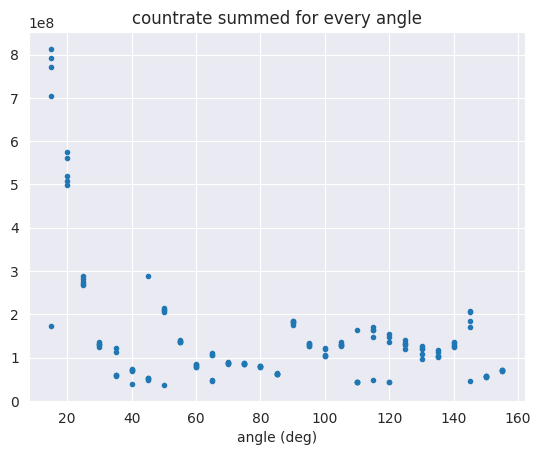

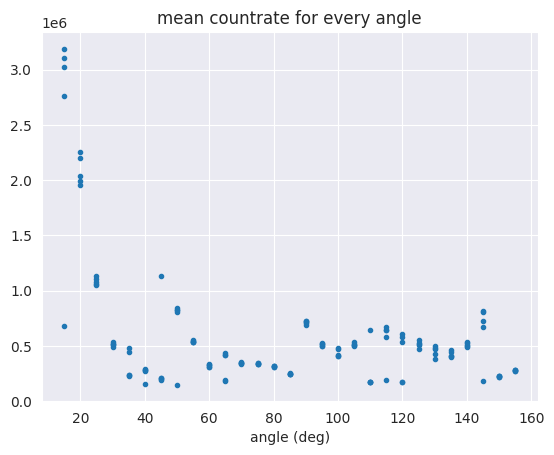

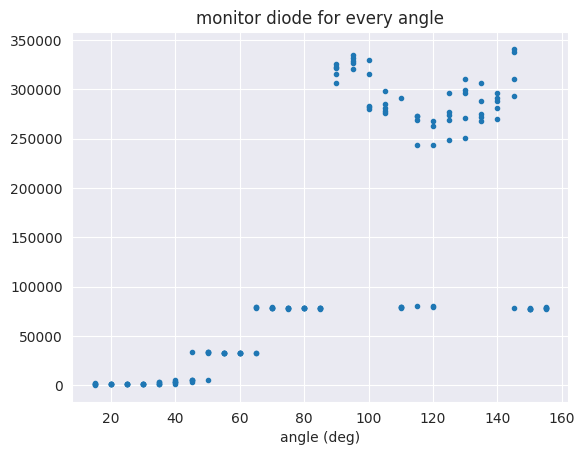

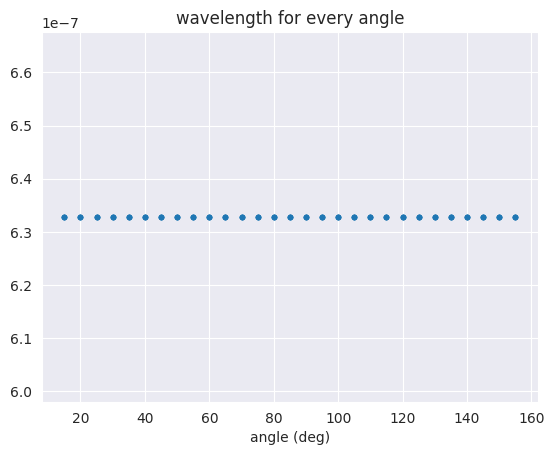

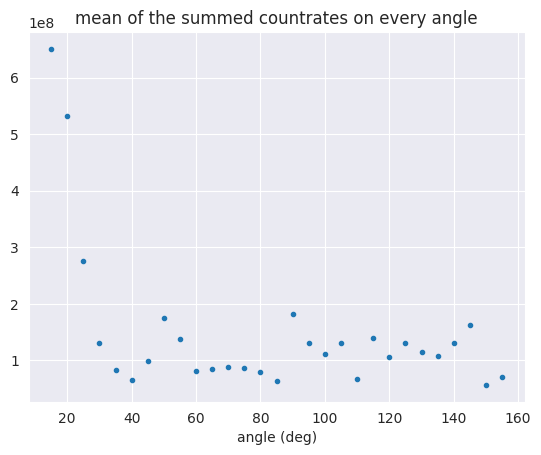

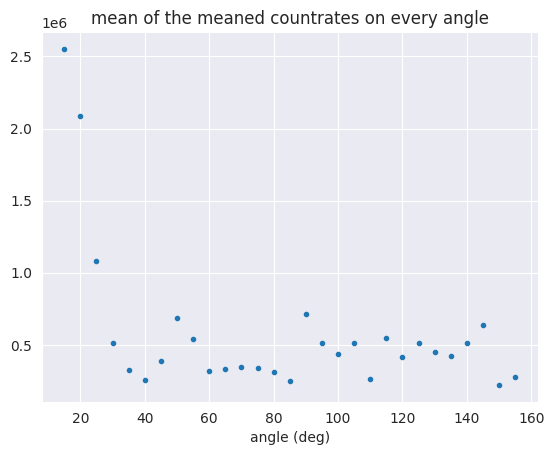

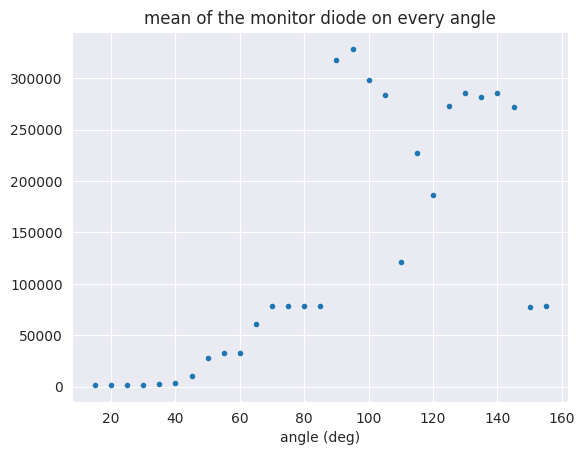

In [ ]:
plt.plot(total_angle, total_sum_count,'.')
plt.title('countrate summed for every angle')
plt.xlabel('angle (deg)')
plt.show()
plt.plot(total_angle, total_mean_count,'.')
plt.title('mean countrate for every angle')
plt.xlabel('angle (deg)')
plt.show()
plt.plot(total_angle, total_diode,'.')
plt.title('monitor diode for every angle')
plt.xlabel('angle (deg)')
plt.show()

plt.plot(total_angle, total_wavelengths,'.')
plt.title('wavelength for every angle')
plt.xlabel('angle (deg)')
plt.show()
plt.plot(mean_angle, mean_sum_count,'.')
plt.title('mean of the summed countrates on every angle')
plt.xlabel('angle (deg)')
plt.show()
plt.plot(mean_angle, mean_mean_count,'.')
plt.title('mean of the meaned countrates on every angle')
plt.xlabel('angle (deg)')
plt.show()
plt.plot(mean_angle, mean_diode,'.')
plt.title('mean of the monitor diode on every angle')
plt.xlabel('angle (deg)')
plt.show()

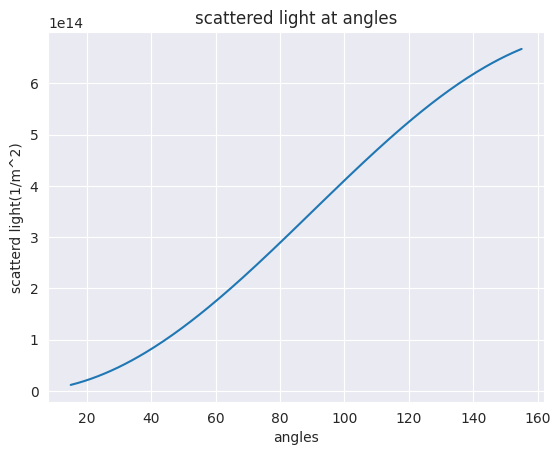

In [ ]:
deg = sp.symbols('deg')

f = (4 * sp.pi * 1.332/6.328e-7 * sp.sin(sp.rad(sp.Symbol('x'))/2))**2

# convert to numeric function
f_num = sp.lambdify(sp.Symbol('x'), f, 'numpy')

# make x-values
x_vals = np.linspace(15, 155, 200)

# compute y-values
y_vals = f_num(x_vals)
fig, ax1 = plt.subplots()

# # plot
# ax1.plot(angle, mean_diode, '.')
# # ax2 = ax1.twinx()
ax1.plot(x_vals, y_vals)
ax1.set_title('scattered light at angles')
ax1.set_ylabel('scatterd light(1/m^2)')
ax1.set_xlabel('angles')
plt.show()

In [ ]:
from read_ASC import read_asc
from read_ASC import dls_sls_analysis
from read_ASC import contin_fit

In [ ]:
voorbeeld = dls_sls_analysis('/home/thijssnel/programeren/jaar_4/technische_stage/NaCl - 0.465micrometer - per_5_graden')

In [ ]:
a = voorbeeld.get_data(data_type='solution',angle=90,indices=1)


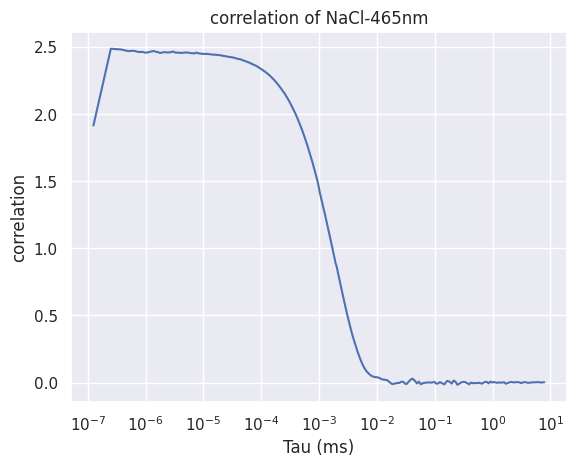

In [ ]:
a.quick_plot_cor()

In [ ]:
a.tikhonov_Phillips_fit()

/home/thijssnel/programeren/jaar_4/dls_sls_technical_internship/from_git/helpers.py:92: RuntimeWarning: overflow encountered in exp
  betaPrior = np.exp(npFit)[-1]
/home/thijssnel/programeren/jaar_4/dls_sls_technical_internship/from_git/helpers.py:80: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt( (g2-1) / beta) # unitless


⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations reached.)
⚠️  fit mislukt (Maximum number of iterations re

Text(0, 0.5, 'Log(penalty term)')

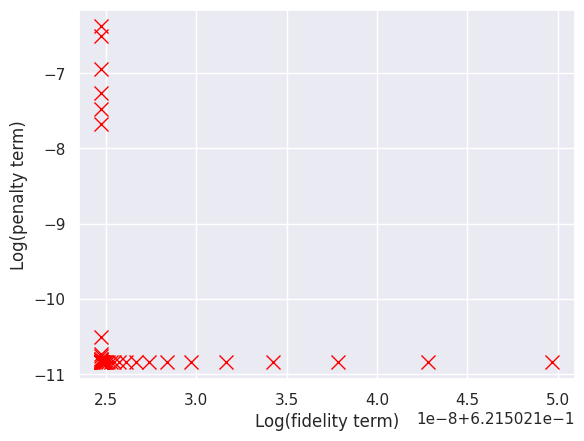

In [ ]:
import matplotlib.pyplot as plt 
figure, axis = plt.subplots(1)

axis.plot(np.log(a.curvesResidualNorm[:]),np.log(a.curvesPenaltyNorm[:]),'bo',markersize=1)
axis.plot(np.log(a.curvesResidualNorm[:])[a.alphaOptIdx[0]],
         np.log(a.curvesPenaltyNorm[:])[a.alphaOptIdx[0]],'x',color='red',markersize=10)

axis.set_xlabel("Log(fidelity term)")
axis.set_ylabel("Log(penalty term)")



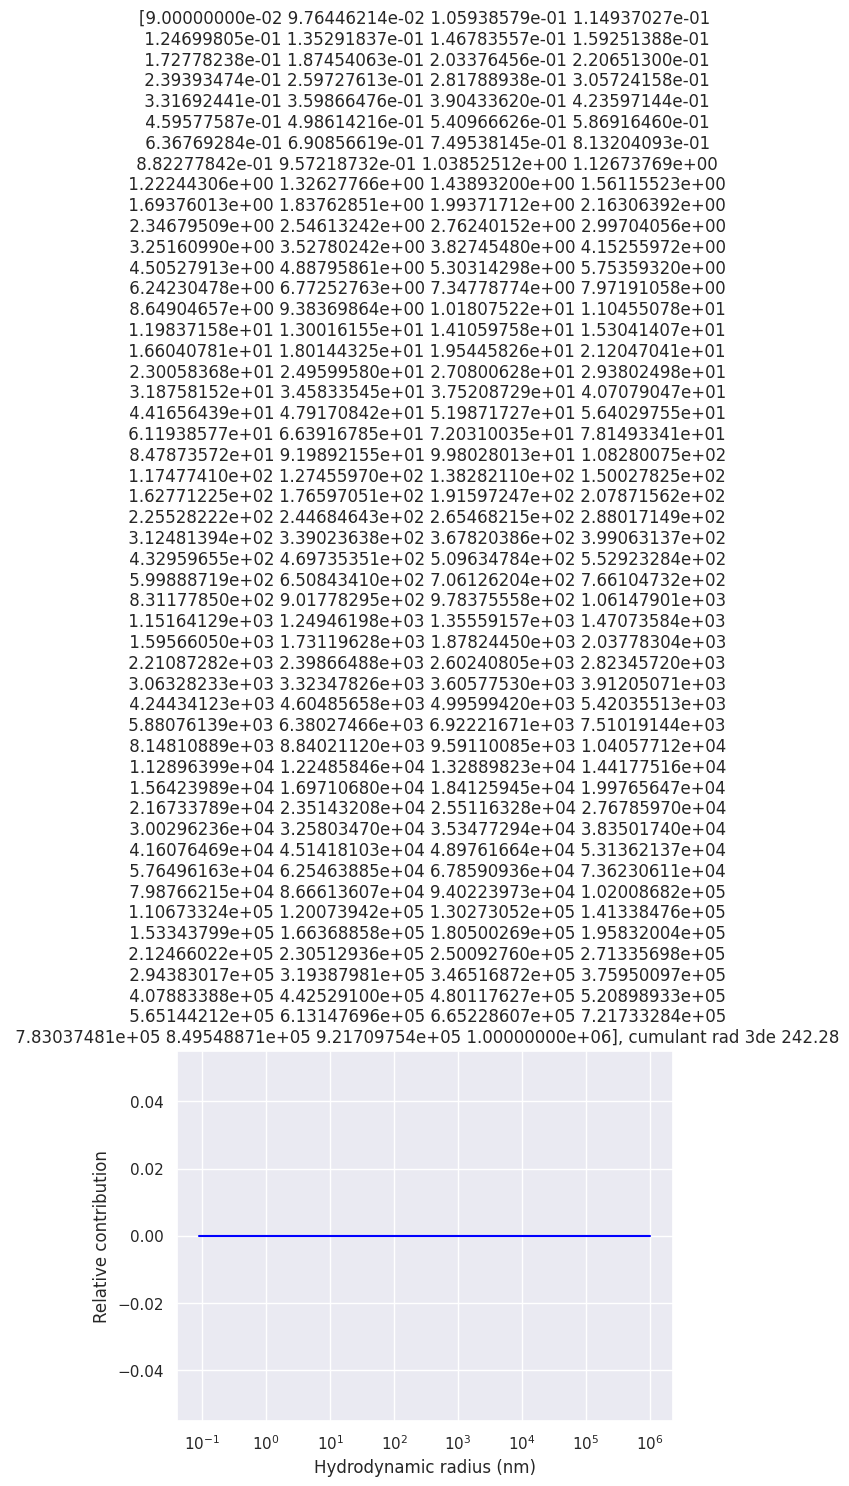

In [ ]:
plt.xscale("log")

plt.plot(a.hrs,a.contributionsGuess,'blue')
plt.title(f'{a.hrs[a.contributionsGuess==max(a.contributionsGuess)]}, cumulant rad 3de {a.Cumulant_3['Hydr_Rad']}')

plt.xlabel("Hydrodynamic radius (nm)")
plt.ylabel("Relative contribution")
plt.show()

In [ ]:
a.ds

array([2.32935626e-09, 2.14699038e-09, 1.97890198e-09, 1.82397325e-09,
       1.68117394e-09, 1.54955442e-09, 1.42823942e-09, 1.31642221e-09,
       1.21335919e-09, 1.11836500e-09, 1.03080793e-09, 9.50105722e-10,
       8.75721711e-10, 8.07161243e-10, 7.43968391e-10, 6.85722922e-10,
       6.32037506e-10, 5.82555134e-10, 5.36946750e-10, 4.94909056e-10,
       4.56162505e-10, 4.20449430e-10, 3.87532341e-10, 3.57192338e-10,
       3.29227662e-10, 3.03452348e-10, 2.79694989e-10, 2.57797599e-10,
       2.37614562e-10, 2.19011659e-10, 2.01865183e-10, 1.86061108e-10,
       1.71494338e-10, 1.58068004e-10, 1.45692821e-10, 1.34286494e-10,
       1.23773172e-10, 1.14082940e-10, 1.05151358e-10, 9.69190326e-11,
       8.93312177e-11, 8.23374547e-11, 7.58912351e-11, 6.99496916e-11,
       6.44733131e-11, 5.94256815e-11, 5.47732303e-11, 5.04850206e-11,
       4.65325360e-11, 4.28894923e-11, 3.95316634e-11, 3.64367197e-11,
       3.35840800e-11, 3.09547741e-11, 2.85313172e-11, 2.62975934e-11,
      

/tmp/ipykernel_27658/2098539521.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[1].set_title(f'calculated radius {int(a.hrs[a.contributionsGuess==max(a.contributionsGuess)])} nm')


{'Fluc_Freq': 0.23092,
 'Diff_Cof': 0.38667,
 'Hydr_Rad': 541.92,
 'Exp_Par_2': -0.0017257,
 'Exp_Par_3': -0.0029778}

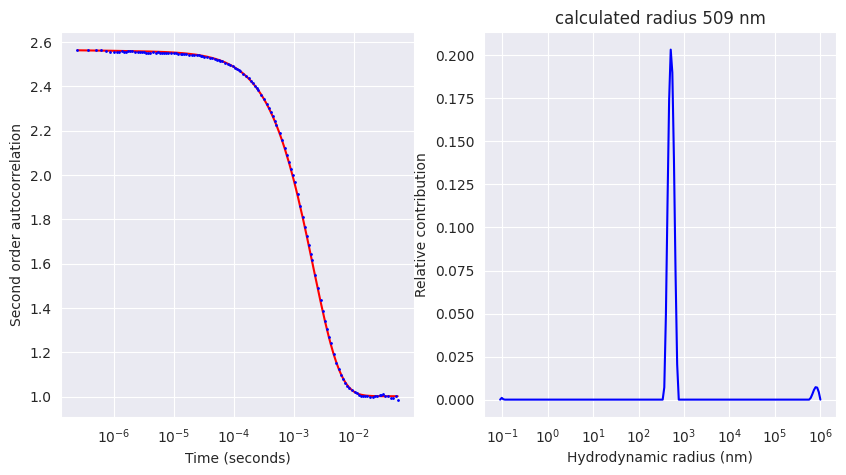

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].set_xscale("log")

ax[0].plot(a.Correlationx,a.autocorrelationPredicted,'red')
ax[0].plot(a.Correlationx,a.Correlationy[:],'bo',markersize=1)
ax[0].set_xlabel("Time (seconds)")
ax[0].set_ylabel("Second order autocorrelation")

ax[1].set_xscale("log")
ax[1].plot(a.hrs,a.contributionsGuess,'blue')
ax[1].set_title(f'calculated radius {int(a.hrs[a.contributionsGuess==max(a.contributionsGuess)])} nm')
ax[1].set_xlabel("Hydrodynamic radius (nm)")
ax[1].set_ylabel("Relative contribution")

a.Cumulant_3

In [ ]:
corx = a.Correlationx
cory = a.Correlationy

npFit     = np.polyfit( corx[corx < 5*1e-5],np.log(corx[corx < 5*1e-5]), 2 )
betaPrior = np.exp(npFit)

print(betaPrior[-1])

1.0844147329777678e-06


/tmp/ipykernel_27658/2390179363.py:5: RuntimeWarning: overflow encountered in exp
  betaPrior = np.exp(npFit)


In [ ]:
a.g1

array([1.00058474, 0.99964154, 0.99937601, 0.99956797, 0.99812097,
       0.99786465, 0.99786144, 0.99694775, 0.99748004, 0.99842527,
       0.99747042, 0.99762428, 0.99801845, 0.99863983, 0.99829075,
       0.99663658, 0.99743515, 0.99743515, 0.9976371 , 0.99731653,
       0.99625149, 0.99606853, 0.9964248 , 0.99741271, 0.9961231 ,
       0.99650503, 0.995908  , 0.99580525, 0.99597222, 0.99611668,
       0.99619693, 0.99576351, 0.99528813, 0.9954327 , 0.99495073,
       0.99460679, 0.99445889, 0.99422092, 0.9942756 , 0.99328456,
       0.99335217, 0.99265983, 0.99249231, 0.99207661, 0.99124791,
       0.99110597, 0.99049278, 0.98980168, 0.98874795, 0.98799737,
       0.98701947, 0.98593359, 0.98501207, 0.98444381, 0.98354366,
       0.98169203, 0.97967044, 0.97805017, 0.97604398, 0.97433235,
       0.9725125 , 0.97061347, 0.96886584, 0.96521203, 0.96166738,
       0.95803618, 0.95453858, 0.95083644, 0.94740339, 0.94378168,
       0.94034668, 0.93332912, 0.9262653 , 0.91949502, 0.91260

In [ ]:
# plt.plot(a.g
a.Correlationy[1]

np.float64(2.5625400000000003)

In [ ]:
np.exp(npFit[0])

np.float64(0.0)

In [ ]:
a.Correlationy

array([2.56549   , 2.56254   , 2.56171   , 2.56231   , 2.55779   ,
       2.55699   , 2.55698   , 2.55413   , 2.55579   , 2.55874   ,
       2.55576   , 2.55624   , 2.55747   , 2.55941   , 2.55832   ,
       2.55316   , 2.55565   , 2.55565   , 2.55628   , 2.55528   ,
       2.55196   , 2.55139   , 2.5525    , 2.55558   , 2.55156   ,
       2.55275   , 2.55089   , 2.55057   , 2.55109   , 2.55154   ,
       2.55179   , 2.55044   , 2.54896   , 2.54941   , 2.54791   ,
       2.54684   , 2.54638   , 2.54564   , 2.54581   , 2.54273   ,
       2.54294   , 2.54079   , 2.54027   , 2.53898   , 2.53641   ,
       2.53597   , 2.53407   , 2.53193   , 2.52867   , 2.52635   ,
       2.52333   , 2.51998   , 2.51714   , 2.51539   , 2.51262   ,
       2.50693   , 2.50073   , 2.49577   , 2.48964   , 2.48442   ,
       2.47888   , 2.47311   , 2.46781   , 2.45676   , 2.44608   ,
       2.43518   , 2.42472   , 2.41369   , 2.4035    , 2.39279   ,
       2.38267   , 2.36211   , 2.34157   , 2.32203   , 2.30229

In [ ]:
a.g1

array([1.00058474, 0.99964154, 0.99937601, 0.99956797, 0.99812097,
       0.99786465, 0.99786144, 0.99694775, 0.99748004, 0.99842527,
       0.99747042, 0.99762428, 0.99801845, 0.99863983, 0.99829075,
       0.99663658, 0.99743515, 0.99743515, 0.9976371 , 0.99731653,
       0.99625149, 0.99606853, 0.9964248 , 0.99741271, 0.9961231 ,
       0.99650503, 0.995908  , 0.99580525, 0.99597222, 0.99611668,
       0.99619693, 0.99576351, 0.99528813, 0.9954327 , 0.99495073,
       0.99460679, 0.99445889, 0.99422092, 0.9942756 , 0.99328456,
       0.99335217, 0.99265983, 0.99249231, 0.99207661, 0.99124791,
       0.99110597, 0.99049278, 0.98980168, 0.98874795, 0.98799737,
       0.98701947, 0.98593359, 0.98501207, 0.98444381, 0.98354366,
       0.98169203, 0.97967044, 0.97805017, 0.97604398, 0.97433235,
       0.9725125 , 0.97061347, 0.96886584, 0.96521203, 0.96166738,
       0.95803618, 0.95453858, 0.95083644, 0.94740339, 0.94378168,
       0.94034668, 0.93332912, 0.9262653 , 0.91949502, 0.91260

In [ ]:
a.Correlationx

array([2.5000e-07, 3.7500e-07, 5.0000e-07, 6.2500e-07, 7.5000e-07,
       8.7500e-07, 1.0000e-06, 1.1250e-06, 1.2500e-06, 1.3750e-06,
       1.5000e-06, 1.6250e-06, 1.7500e-06, 1.8750e-06, 2.0000e-06,
       2.2500e-06, 2.5000e-06, 2.7500e-06, 3.0000e-06, 3.2500e-06,
       3.5000e-06, 3.7500e-06, 4.0000e-06, 4.5000e-06, 5.0000e-06,
       5.5000e-06, 6.0000e-06, 6.5000e-06, 7.0000e-06, 7.5000e-06,
       8.0000e-06, 9.0000e-06, 1.0000e-05, 1.1000e-05, 1.2000e-05,
       1.3000e-05, 1.4000e-05, 1.5000e-05, 1.6000e-05, 1.8000e-05,
       2.0000e-05, 2.2000e-05, 2.4000e-05, 2.6000e-05, 2.8000e-05,
       3.0000e-05, 3.2000e-05, 3.6000e-05, 4.0000e-05, 4.4000e-05,
       4.8000e-05, 5.2000e-05, 5.6000e-05, 6.0000e-05, 6.4000e-05,
       7.2000e-05, 8.0000e-05, 8.8000e-05, 9.6000e-05, 1.0400e-04,
       1.1200e-04, 1.2000e-04, 1.2800e-04, 1.4400e-04, 1.6000e-04,
       1.7600e-04, 1.9200e-04, 2.0800e-04, 2.2400e-04, 2.4000e-04,
       2.5600e-04, 2.8800e-04, 3.2000e-04, 3.5200e-04, 3.8400e

In [ ]:
a.Correlationy

array([2.56549   , 2.56254   , 2.56171   , 2.56231   , 2.55779   ,
       2.55699   , 2.55698   , 2.55413   , 2.55579   , 2.55874   ,
       2.55576   , 2.55624   , 2.55747   , 2.55941   , 2.55832   ,
       2.55316   , 2.55565   , 2.55565   , 2.55628   , 2.55528   ,
       2.55196   , 2.55139   , 2.5525    , 2.55558   , 2.55156   ,
       2.55275   , 2.55089   , 2.55057   , 2.55109   , 2.55154   ,
       2.55179   , 2.55044   , 2.54896   , 2.54941   , 2.54791   ,
       2.54684   , 2.54638   , 2.54564   , 2.54581   , 2.54273   ,
       2.54294   , 2.54079   , 2.54027   , 2.53898   , 2.53641   ,
       2.53597   , 2.53407   , 2.53193   , 2.52867   , 2.52635   ,
       2.52333   , 2.51998   , 2.51714   , 2.51539   , 2.51262   ,
       2.50693   , 2.50073   , 2.49577   , 2.48964   , 2.48442   ,
       2.47888   , 2.47311   , 2.46781   , 2.45676   , 2.44608   ,
       2.43518   , 2.42472   , 2.41369   , 2.4035    , 2.39279   ,
       2.38267   , 2.36211   , 2.34157   , 2.32203   , 2.30229

In [ ]:
b = np.array([[1,2,3],[4,5,6]])

In [ ]:
b.shape[0]

2

In [ ]:
a